In [1]:
# ============================================================================
# 🎯 TASK 3: FEATURE ENGINEERING PIPELINE - SETUP AND IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import sys
import os

# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'figure.titlesize': 18,
    'figure.titleweight': 'bold',
    'legend.fontsize': 10,
    'figure.figsize': (12, 8),
    'figure.dpi': 100
})

warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")

✅ Libraries imported successfully
Python version: 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
Pandas version: 2.3.3


In [2]:
# ============================================================================
# 📥 LOAD YOUR EXACT DATA
# ============================================================================

print("\n" + "="*80)
print("🔍 FINDING YOUR DATA FILE")
print("="*80)

current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

# List all possible paths where your data might be
possible_paths = [
    current_dir / "data" / "processed" / "cleaned_data.csv",
    current_dir.parent.parent / "data" / "processed" / "cleaned_data.csv",
    current_dir.parent / "data" / "processed" / "cleaned_data.csv",
    Path("data/processed/cleaned_data.csv"),
    Path("../data/processed/cleaned_data.csv"),
    Path("../../data/processed/cleaned_data.csv"),
    Path("../../../data/processed/cleaned_data.csv")
]

# Check each path
cleaned_data_path = None
for i, path in enumerate(possible_paths, 1):
    exists = path.exists()
    print(f"{i:2d}. {path} {'✅ EXISTS' if exists else '❌ Not found'}")
    if exists:
        cleaned_data_path = path
        print(f"   File size: {path.stat().st_size:,} bytes")

if cleaned_data_path is None:
    print("\n❌ ERROR: cleaned_data.csv not found!")
    print("\nPlease make sure your data file is in one of these locations.")
    print("If it's elsewhere, modify the path in the next cell.")
else:
    print(f"\n✅ Will load data from: {cleaned_data_path}")


🔍 FINDING YOUR DATA FILE
Current directory: d:\10 acadamy\Credit Risk  Model\notebooks\task3
 1. d:\10 acadamy\Credit Risk  Model\notebooks\task3\data\processed\cleaned_data.csv ❌ Not found
 2. d:\10 acadamy\Credit Risk  Model\data\processed\cleaned_data.csv ✅ EXISTS
   File size: 19,259,923 bytes
 3. d:\10 acadamy\Credit Risk  Model\notebooks\data\processed\cleaned_data.csv ❌ Not found
 4. data\processed\cleaned_data.csv ❌ Not found
 5. ..\data\processed\cleaned_data.csv ❌ Not found
 6. ..\..\data\processed\cleaned_data.csv ✅ EXISTS
   File size: 19,259,923 bytes
 7. ..\..\..\data\processed\cleaned_data.csv ❌ Not found

✅ Will load data from: ..\..\data\processed\cleaned_data.csv


In [3]:
# ============================================================================
# 📂 LOAD THE DATA FILE
# ============================================================================

import pandas as pd
from pathlib import Path

print("\n" + "="*80)
print("📂 DATA LOADER")
print("="*80)

# ---------------------------------------------------------------------------
# Step 1: Define your data path
# ---------------------------------------------------------------------------
cleaned_data_path = Path(r"d:\10 acadamy\Credit Risk Model\data\processed\cleaned_data.csv")

print(f"🔍 Looking for data at: {cleaned_data_path}")

# Check if file exists
if cleaned_data_path.exists():
    print(f"✅ File exists! Size: {cleaned_data_path.stat().st_size / 1024**2:.2f} MB")
else:
    print(f"❌ File not found at specified location.")
    print("\n📁 Searching for alternative locations...")
    
    # Try common alternative paths
    alternative_paths = [
        Path(r"d:\10 acadamy\Credit Risk  Model\data\processed\cleaned_data.csv"),  # Note: Two spaces in "10 acadamy"
        Path(r"d:\10 academy\Credit Risk Model\data\processed\cleaned_data.csv"),
        Path(r"d:\10_academy\Credit Risk Model\data\processed\cleaned_data.csv"),
        Path("cleaned_data.csv"),
        Path("data/processed/cleaned_data.csv"),
        Path("data/cleaned_data.csv"),
        Path("processed/cleaned_data.csv")
    ]
    
    found = False
    for path in alternative_paths:
        if path.exists():
            cleaned_data_path = path
            print(f"✅ Found at alternative location: {path}")
            found = True
            break
    
    if not found:
        print("\n❌ Could not find cleaned_data.csv in common locations.")
        print("\n📁 Listing CSV files in current directory:")
        
        import os
        csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
        
        if csv_files:
            print("Available CSV files:")
            for file in csv_files:
                print(f"  • {file}")
            
            # Ask user to select
            selected_file = input("\n📝 Enter the name of your data file (or press Enter to use 'cleaned_data.csv'): ").strip()
            if selected_file:
                cleaned_data_path = Path(selected_file)
            else:
                cleaned_data_path = Path("cleaned_data.csv")
        else:
            print("No CSV files found in current directory.")
            raise FileNotFoundError("Please provide the correct path to your data file.")

# ---------------------------------------------------------------------------
# Step 2: Load the data
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("📊 LOADING DATA")
print("="*80)

if cleaned_data_path.exists():
    try:
        # First, check the file structure
        print("🔍 Examining file structure...")
        
        # Read first few rows to see columns
        preview = pd.read_csv(cleaned_data_path, nrows=5)
        print(f"📋 Columns found ({len(preview.columns)}): {list(preview.columns)}")
        
        # Check if TransactionStartTime exists
        if 'TransactionStartTime' in preview.columns:
            print("✅ Found 'TransactionStartTime' column")
            parse_dates = ['TransactionStartTime']
        else:
            print("⚠️ 'TransactionStartTime' column not found.")
            
            # Look for other date columns
            date_keywords = ['date', 'time', 'datetime', 'timestamp']
            date_cols = [col for col in preview.columns 
                        if any(keyword in col.lower() for keyword in date_keywords)]
            
            if date_cols:
                print(f"📅 Found potential date columns: {date_cols}")
                parse_dates = date_cols
            else:
                print("ℹ️ No date columns detected")
                parse_dates = []
        
        # Load the full dataset
        print("\n📥 Loading full dataset...")
        
        if parse_dates:
            df = pd.read_csv(cleaned_data_path, parse_dates=parse_dates)
            print(f"✅ Data loaded with date parsing for: {parse_dates}")
        else:
            df = pd.read_csv(cleaned_data_path)
            print(f"✅ Data loaded (no date parsing)")
        
        print(f"\n📊 DATA LOADED SUCCESSFULLY!")
        print(f"   • Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Show basic info
        print("\n📋 FIRST 3 ROWS:")
        print(df.head(3))
        
        print("\n📊 COLUMN SUMMARY:")
        for i, col in enumerate(df.columns, 1):
            dtype = df[col].dtype
            null_count = df[col].isnull().sum()
            null_pct = (null_count / len(df)) * 100
            print(f"   {i:2d}. {col:25} {str(dtype):15} Nulls: {null_count:6,} ({null_pct:.1f}%)")
        
        print("\n🔢 DATA TYPE DISTRIBUTION:")
        print(df.dtypes.value_counts())
        
        # Show date columns if any
        date_columns = df.select_dtypes(include=['datetime64']).columns.tolist()
        if date_columns:
            print(f"\n📅 DATETIME COLUMNS FOUND ({len(date_columns)}):")
            for col in date_columns:
                date_range = f"{df[col].min()} to {df[col].max()}"
                print(f"   • {col}: {date_range}")
        else:
            print("\n📅 No datetime columns found after loading")
            
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        print("\nTrying simplified loading...")
        
        # Try loading without date parsing
        try:
            df = pd.read_csv(cleaned_data_path)
            print(f"✅ Data loaded successfully (simplified)")
            print(f"   Shape: {df.shape}")
            
            # Check if TransactionStartTime exists as string
            if 'TransactionStartTime' in df.columns:
                print(f"\nℹ️ 'TransactionStartTime' loaded as {df['TransactionStartTime'].dtype}")
                print("   You may need to convert it to datetime manually:")
                print("   df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])")
                
        except Exception as e2:
            print(f"❌ Failed to load data: {e2}")
            raise
else:
    print(f"\n❌ Cannot load data - file not found: {cleaned_data_path}")
    print("Please check the file path and try again.")
    
print("\n" + "="*80)
print("✅ DATA LOADING COMPLETE")
print("="*80)
print(f"""
📦 DATAFRAME AVAILABLE AS: 'df'
• Type: {type(df)}
• Shape: {df.shape}
• Columns: {len(df.columns)}
• Size in memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

💡 NEXT STEPS:
1. Check your data: display(df.head())
2. Create aggregate features (Requirement 1)
3. Extract temporal features (Requirement 2)
""")

# Create a simple verification
print("\n🔍 QUICK VERIFICATION:")
print(f"DataFrame 'df' exists: {'df' in locals()}")
if 'df' in locals():
    print(f"DataFrame shape: {df.shape}")
    print(f"First 3 rows shown above")


📂 DATA LOADER
🔍 Looking for data at: d:\10 acadamy\Credit Risk Model\data\processed\cleaned_data.csv
❌ File not found at specified location.

📁 Searching for alternative locations...
✅ Found at alternative location: d:\10 acadamy\Credit Risk  Model\data\processed\cleaned_data.csv

📊 LOADING DATA
🔍 Examining file structure...
📋 Columns found (21): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'TransactionStartTime_hour', 'TransactionStartTime_day', 'TransactionStartTime_month', 'TransactionStartTime_year', 'TransactionStartTime_dayofweek']
✅ Found 'TransactionStartTime' column

📥 Loading full dataset...
✅ Data loaded with date parsing for: ['TransactionStartTime']

📊 DATA LOADED SUCCESSFULLY!
   • Shape: 95,662 rows × 21 columns
   • Memory usage: 71.86 MB

📋 FIRST 3 ROWS:
         TransactionI

In [4]:

# ============================================================================
# EXPLORE DATA STRUCTURE
# ============================================================================

print("\n" + "="*80)
print("🔍 EXPLORING DATA STRUCTURE")
print("="*80)

print("\n1. COLUMN ANALYSIS:")
print(f"   Total columns: {len(df.columns)}")
print(f"   Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
print(f"   Datetime columns: {len(df.select_dtypes(include=['datetime']).columns)}")

print("\n2. REQUIRED COLUMNS CHECK:")
required_cols = ['CustomerId', 'Value', 'TransactionStartTime']
for col in required_cols:
    if col in df.columns:
        print(f"   ✅ {col}")
    else:
        print(f"   ❌ {col} (MISSING)")

print("\n3. DATA QUALITY METRICS:")
# Check for duplicates
duplicate_rows = df.duplicated().sum()
duplicate_customers = df['CustomerId'].duplicated().sum() if 'CustomerId' in df.columns else 0
print(f"   Duplicate rows: {duplicate_rows:,}")
print(f"   Duplicate CustomerId entries: {duplicate_customers:,}")

# Check date range
if 'TransactionStartTime' in df.columns:
    print(f"   Date range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
    print(f"   Date span: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days} days")

# Check transaction values
if 'Value' in df.columns:
    print(f"\n4. TRANSACTION VALUE ANALYSIS:")
    print(f"   Total value: ${df['Value'].sum():,.2f}")
    print(f"   Average value: ${df['Value'].mean():,.2f}")
    print(f"   Min value: ${df['Value'].min():,.2f}")
    print(f"   Max value: ${df['Value'].max():,.2f}")
    print(f"   Std dev: ${df['Value'].std():,.2f}")
    
    # Check for negative values (possible refunds)
    negative_values = (df['Value'] < 0).sum()
    if negative_values > 0:
        print(f"   ⚠️  Negative values: {negative_values:,} (possible refunds)")

print("\n5. CUSTOMER ANALYSIS:")
if 'CustomerId' in df.columns:
    unique_customers = df['CustomerId'].nunique()
    print(f"   Unique customers: {unique_customers:,}")
    print(f"   Transactions per customer: {len(df) / unique_customers:.1f}")
    
    # Top 5 customers by transaction count
    top_customers = df['CustomerId'].value_counts().head(5)
    print(f"   Top 5 customers by transaction count:")
    for cust, count in top_customers.items():
        print(f"      {cust}: {count:,} transactions")


🔍 EXPLORING DATA STRUCTURE

1. COLUMN ANALYSIS:
   Total columns: 21
   Numeric columns: 10
   Categorical columns: 10
   Datetime columns: 0

2. REQUIRED COLUMNS CHECK:
   ✅ CustomerId
   ✅ Value
   ✅ TransactionStartTime

3. DATA QUALITY METRICS:
   Duplicate rows: 0
   Duplicate CustomerId entries: 91,920
   Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
   Date span: 90 days

4. TRANSACTION VALUE ANALYSIS:
   Total value: $947,109,661.00
   Average value: $9,900.58
   Min value: $2.00
   Max value: $9,880,000.00
   Std dev: $123,122.09

5. CUSTOMER ANALYSIS:
   Unique customers: 3,742
   Transactions per customer: 25.6
   Top 5 customers by transaction count:
      CustomerId_7343: 4,091 transactions
      CustomerId_3634: 2,085 transactions
      CustomerId_647: 1,869 transactions
      CustomerId_1096: 784 transactions
      CustomerId_4033: 778 transactions


In [5]:
# ============================================================================
# 🔧 CREATE AGGREGATE FEATURES - REQUIREMENT 1
# ============================================================================

print("\n" + "="*80)
print("🔧 CREATING AGGREGATE FEATURES")
print("="*80)

# Check if we have the required columns
print("Checking required columns...")
required_columns = ['CustomerId', 'Value']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    print(f"❌ Missing required columns: {missing_cols}")
    print(f"Available columns: {list(df.columns)}")
else:
    print(f"✅ All required columns found!")
    
    # Create aggregate features per customer
    print("\nCreating customer aggregates...")
    
    # Group by CustomerId
    customer_aggregates = df.groupby('CustomerId').agg({
        'Value': ['sum', 'mean', 'std', 'count']
    })
    
    # Flatten column names
    customer_aggregates.columns = [
        'total_transaction_amount',
        'avg_transaction_amount',
        'std_transaction_amount',
        'transaction_count'
    ]
    
    # Fill NaN values for std
    customer_aggregates['std_transaction_amount'] = customer_aggregates['std_transaction_amount'].fillna(0)
    
    # Reset index
    customer_aggregates = customer_aggregates.reset_index()
    
    print(f"✅ Created aggregates for {len(customer_aggregates):,} unique customers")
    print("\n📊 AGGREGATE FEATURES SUMMARY:")
    print(customer_aggregates.describe())
    
    # Show first few rows
    print("\n📋 SAMPLE OF AGGREGATE FEATURES:")
    print(customer_aggregates.head(10))


🔧 CREATING AGGREGATE FEATURES
Checking required columns...
✅ All required columns found!

Creating customer aggregates...
✅ Created aggregates for 3,742 unique customers

📊 AGGREGATE FEATURES SUMMARY:
       total_transaction_amount  avg_transaction_amount  \
count              3.742000e+03            3.742000e+03   
mean               2.531025e+05            1.875612e+04   
std                2.715877e+06            1.674529e+05   
min                5.000000e+01            5.000000e+01   
25%                6.500000e+03            1.160655e+03   
50%                3.200000e+04            3.950000e+03   
75%                1.020600e+05            7.096039e+03   
max                1.049000e+08            8.601821e+06   

       std_transaction_amount  transaction_count  
count            3.742000e+03        3742.000000  
mean             1.274420e+04          25.564404  
std              9.692118e+04          96.929602  
min              0.000000e+00           1.000000  
25%        

In [6]:
# ============================================================================
# 📊 VISUALIZATION FUNCTION
# ============================================================================

def save_and_show_visualization(filename):
    """
    Save and display visualization
    """
    # Create reports directory
    reports_dir = Path("reports/task3_visualizations")
    reports_dir.mkdir(parents=True, exist_ok=True)
    
    # Save figure
    save_path = reports_dir / filename
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    print(f"✅ Visualization saved to: {save_path}")
    
    # Show plot
    plt.show()
    
    # Clear figure for next plot
    plt.clf()
    plt.close()


📊 VISUALIZATION: AGGREGATE FEATURES (Display Only)
📋 Data Summary:
• Total customers: 3,742
• Features: ['CustomerId', 'total_transaction_amount', 'avg_transaction_amount', 'std_transaction_amount', 'transaction_count']

✅ DISPLAYING VISUALIZATION IN NOTEBOOK...


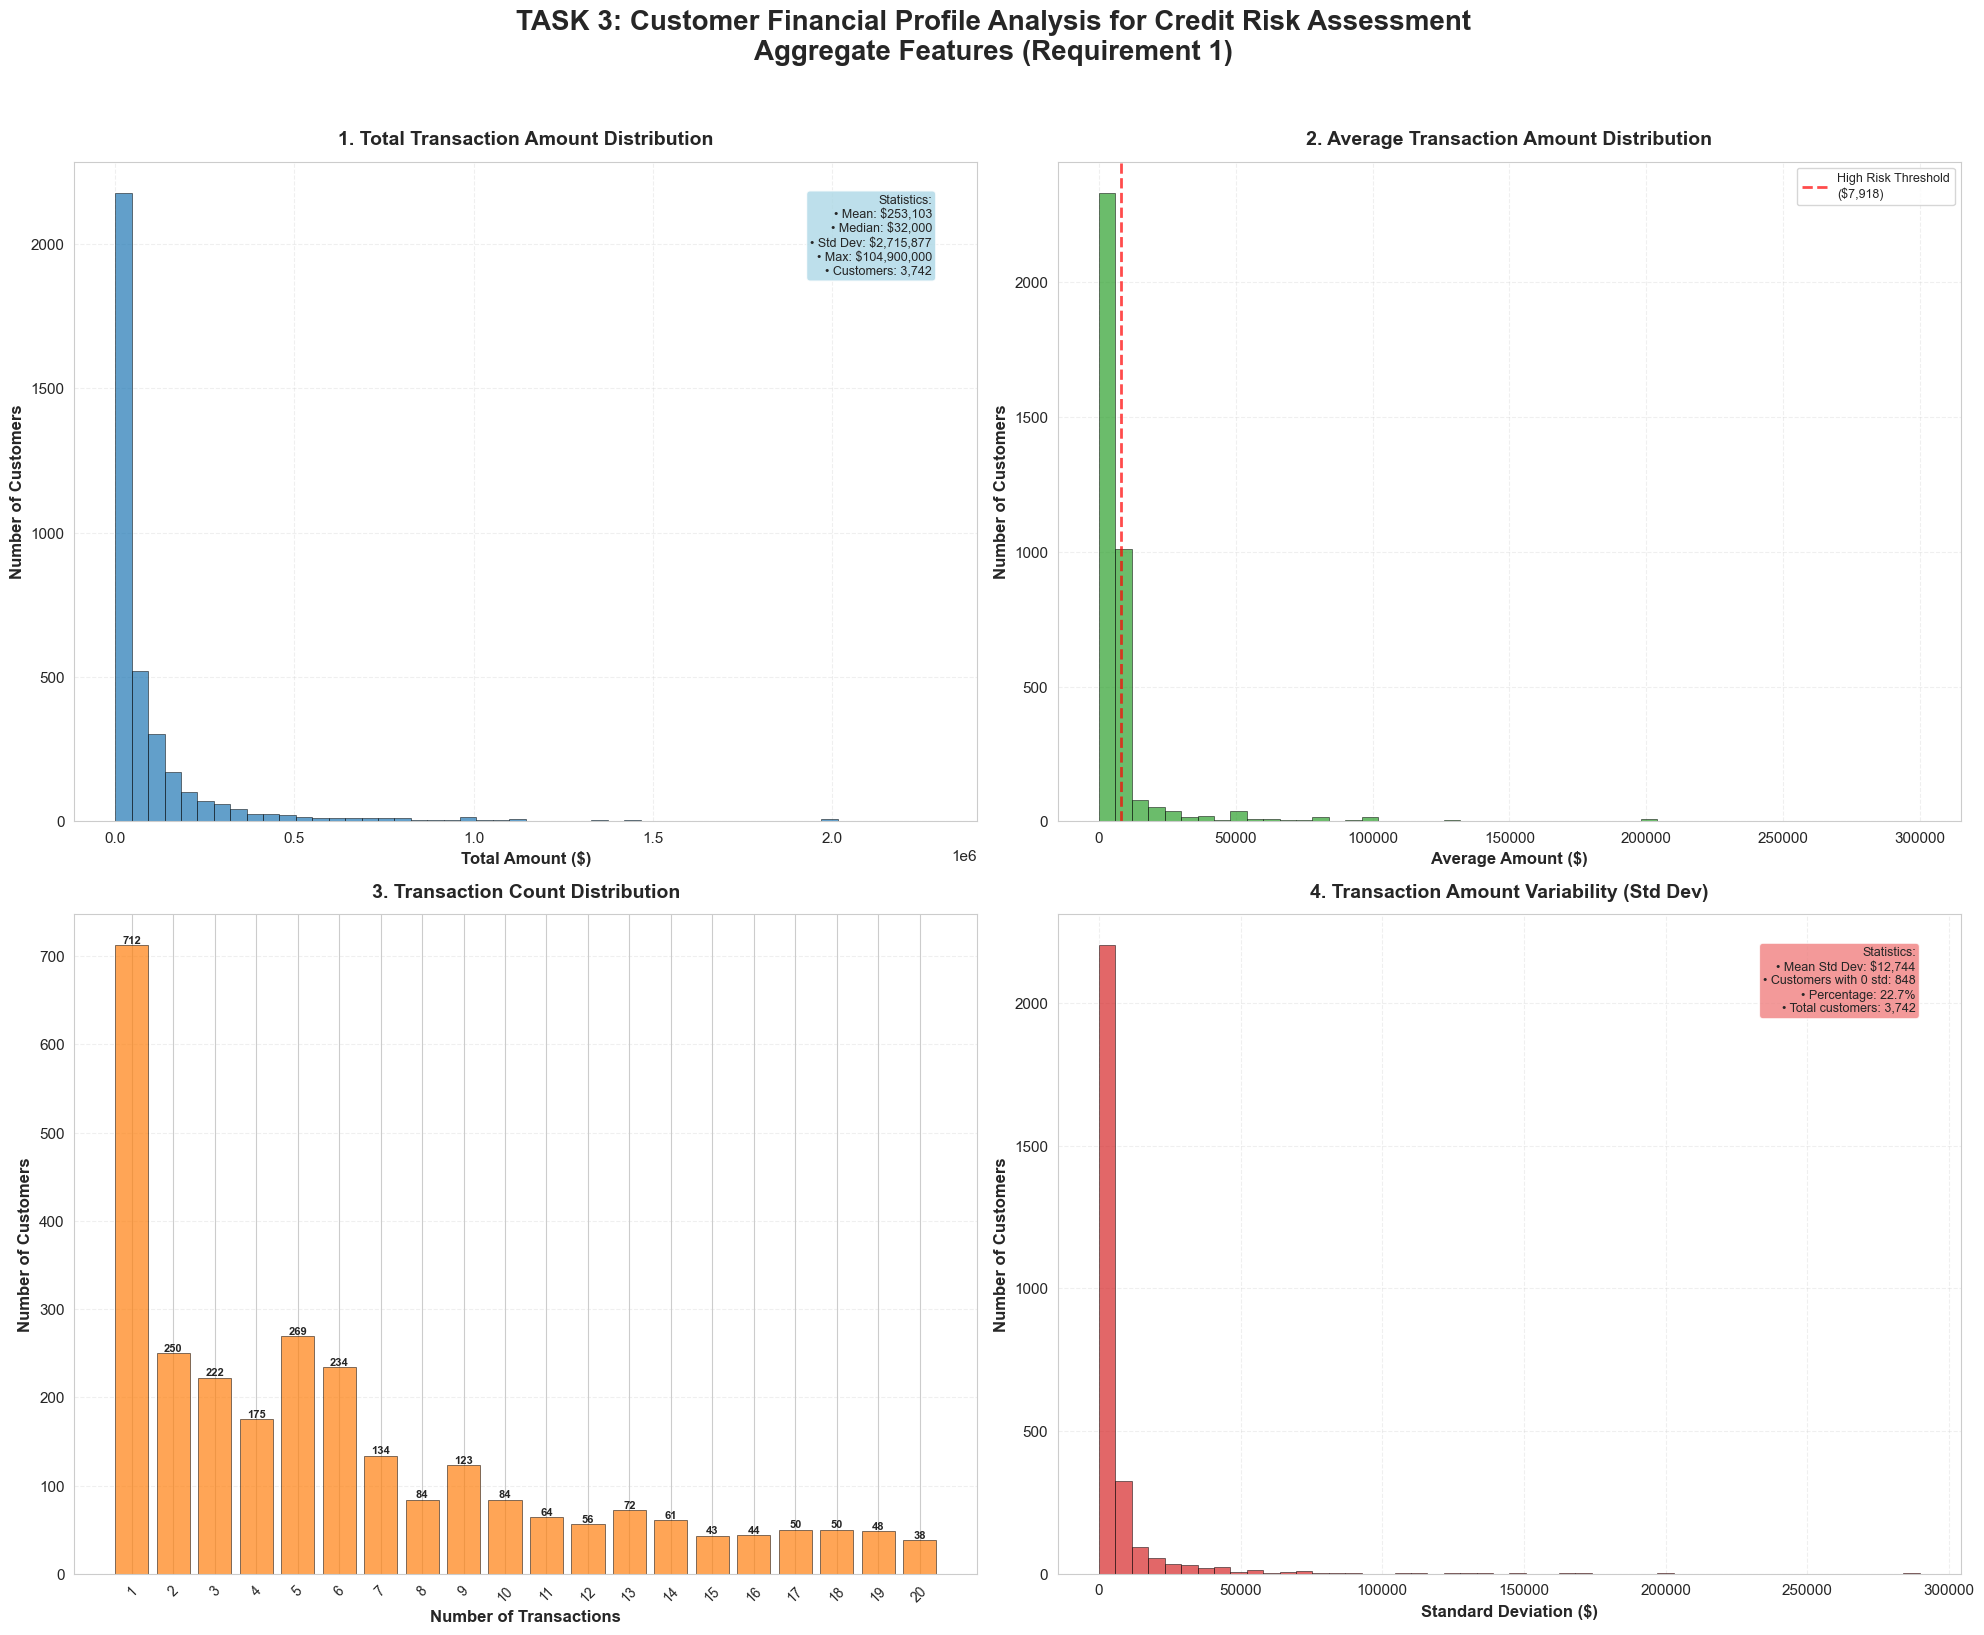


📊 VISUALIZATION DISPLAYED SUCCESSFULLY!

📈 KEY METRICS DISPLAYED:
1. Total Transaction Amount per customer
2. Average Transaction Amount per customer  
3. Transaction Count per customer
4. Standard Deviation of Transaction Amounts per customer

📊 DATA SUMMARY:
• Total customers analyzed: 3,742
• Average total amount per customer: $253,103
• Average transaction count per customer: 25.6
• Customers with single transaction: 848 (22.7%)



In [11]:
# ============================================================================
# 📈 VISUALIZATION: AGGREGATE FEATURES - REQUIREMENT 1 (Display Only)
# ============================================================================

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("📊 VISUALIZATION: AGGREGATE FEATURES (Display Only)")
print("="*80)

print(f"📋 Data Summary:")
print(f"• Total customers: {len(customer_aggregates):,}")
print(f"• Features: {list(customer_aggregates.columns)}")

# Create the visualization
fig = plt.figure(figsize=(20, 16))
fig.suptitle('TASK 3: Customer Financial Profile Analysis for Credit Risk Assessment\nAggregate Features (Requirement 1)', 
             fontsize=20, fontweight='bold', y=1.02)

# 1. Total Transaction Amount Distribution
ax1 = plt.subplot(2, 2, 1)
total_amount = customer_aggregates['total_transaction_amount']

# Remove extreme outliers for better visualization (top 1%)
q99 = total_amount.quantile(0.99)
plot_data = total_amount[total_amount <= q99] if q99 > 0 else total_amount

n, bins, patches = ax1.hist(plot_data, bins=50, alpha=0.7, 
                           color='#1f77b4', edgecolor='black', linewidth=0.5)

ax1.set_title('1. Total Transaction Amount Distribution', 
              fontsize=14, fontweight='bold', pad=12)
ax1.set_xlabel('Total Amount ($)', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')

# Add statistics
stats_text = f"""Statistics:
• Mean: ${total_amount.mean():,.0f}
• Median: ${total_amount.median():,.0f}
• Std Dev: ${total_amount.std():,.0f}
• Max: ${total_amount.max():,.0f}
• Customers: {len(total_amount):,}"""

ax1.text(0.95, 0.95, stats_text, transform=ax1.transAxes,
         fontsize=9, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 2. Average Transaction Amount Distribution
ax2 = plt.subplot(2, 2, 2)
avg_amount = customer_aggregates['avg_transaction_amount']

q99_avg = avg_amount.quantile(0.99)
plot_avg = avg_amount[avg_amount <= q99_avg] if q99_avg > 0 else avg_amount

ax2.hist(plot_avg, bins=50, alpha=0.7, color='#2ca02c', 
         edgecolor='black', linewidth=0.5)

ax2.set_title('2. Average Transaction Amount Distribution', 
              fontsize=14, fontweight='bold', pad=12)
ax2.set_xlabel('Average Amount ($)', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.grid(True, alpha=0.3, linestyle='--')

# Add risk threshold line (80th percentile)
risk_threshold = avg_amount.quantile(0.8)
ax2.axvline(risk_threshold, color='red', linestyle='--', alpha=0.7, 
            linewidth=2, label=f'High Risk Threshold\n(${risk_threshold:,.0f})')
ax2.legend(fontsize=9, loc='upper right')

# 3. Transaction Count Distribution
ax3 = plt.subplot(2, 2, 3)
transaction_count = customer_aggregates['transaction_count']

# Show top 20 transaction counts
top_counts = transaction_count.value_counts().sort_index().head(20)

bars = ax3.bar(range(len(top_counts)), top_counts.values,
               alpha=0.7, color='#ff7f0e', edgecolor='black', linewidth=0.5)

ax3.set_title('3. Transaction Count Distribution', 
              fontsize=14, fontweight='bold', pad=12)
ax3.set_xlabel('Number of Transactions', fontsize=12)
ax3.set_ylabel('Number of Customers', fontsize=12)
ax3.set_xticks(range(len(top_counts)))
ax3.set_xticklabels([str(x) for x in top_counts.index], rotation=45, fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels on top of bars
for bar, count in zip(bars, top_counts.values):
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 4. Transaction Amount Variability
ax4 = plt.subplot(2, 2, 4)
std_amount = customer_aggregates['std_transaction_amount']

# Remove zeros and extreme outliers
non_zero_std = std_amount[std_amount > 0]
if len(non_zero_std) > 0:
    q99_std = non_zero_std.quantile(0.99)
    plot_std = non_zero_std[non_zero_std <= q99_std] if q99_std > 0 else non_zero_std
    
    n4, bins4, patches4 = ax4.hist(plot_std, bins=50, alpha=0.7, 
                                  color='#d62728', edgecolor='black', linewidth=0.5)
    
    ax4.set_title('4. Transaction Amount Variability (Std Dev)', 
                  fontsize=14, fontweight='bold', pad=12)
    ax4.set_xlabel('Standard Deviation ($)', fontsize=12)
    ax4.set_ylabel('Number of Customers', fontsize=12)
    ax4.grid(True, alpha=0.3, linestyle='--')
    
    # Add statistics
    zero_count = (std_amount == 0).sum()
    zero_pct = (zero_count / len(std_amount)) * 100
    
    stats_text_std = f"""Statistics:
• Mean Std Dev: ${std_amount.mean():,.0f}
• Customers with 0 std: {zero_count:,}
• Percentage: {zero_pct:.1f}%
• Total customers: {len(std_amount):,}"""
    
    ax4.text(0.95, 0.95, stats_text_std, transform=ax4.transAxes,
             fontsize=9, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
else:
    ax4.text(0.5, 0.5, 'All customers have 0 std dev\n(only one transaction each)', 
             ha='center', va='center', fontsize=12)
    ax4.set_title('4. Transaction Amount Variability (Std Dev)', fontsize=14, fontweight='bold', pad=12)

# Adjust layout and display
plt.tight_layout()
print("\n✅ DISPLAYING VISUALIZATION IN NOTEBOOK...")
plt.show()

print("\n" + "="*80)
print("📊 VISUALIZATION DISPLAYED SUCCESSFULLY!")
print("="*80)
print(f"""
📈 KEY METRICS DISPLAYED:
1. Total Transaction Amount per customer
2. Average Transaction Amount per customer  
3. Transaction Count per customer
4. Standard Deviation of Transaction Amounts per customer

📊 DATA SUMMARY:
• Total customers analyzed: {len(customer_aggregates):,}
• Average total amount per customer: ${total_amount.mean():,.0f}
• Average transaction count per customer: {transaction_count.mean():.1f}
• Customers with single transaction: {zero_count:,} ({zero_pct:.1f}%)
""")

In [7]:
# ============================================================================
# CUSTOM TRANSFORMER: TEMPORAL FEATURES
# Requirement 2: Extract Temporal Features
# ============================================================================

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class TemporalFeatureTransformer(BaseEstimator, TransformerMixin):
    """
    Extracts temporal features from datetime columns (Requirement 2)
    1. Transaction Hour
    2. Transaction Day
    3. Transaction Month
    4. Transaction Year
    """
    
    def __init__(self, datetime_col='TransactionStartTime'):
        """
        Initialize the transformer
        
        Parameters:
        -----------
        datetime_col : str
            Name of the datetime column to extract features from
        """
        self.datetime_col = datetime_col
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        """
        Fit method (required for sklearn interface)
        
        Parameters:
        -----------
        X : DataFrame
            Input data
        y : array-like, optional
            Target values
        """
        # Get feature names when we transform
        self.feature_names_ = None
        return self
    
    def transform(self, X):
        """
        Extract temporal features from datetime column
        
        Parameters:
        -----------
        X : DataFrame
            Input data with datetime column
            
        Returns:
        --------
        DataFrame with temporal features
        """
        X_transformed = X.copy()
        
        # Ensure datetime column exists
        if self.datetime_col not in X_transformed.columns:
            raise ValueError(f"Datetime column '{self.datetime_col}' not found in input data")
        
        # Convert to datetime if not already
        if not pd.api.types.is_datetime64_any_dtype(X_transformed[self.datetime_col]):
            X_transformed[self.datetime_col] = pd.to_datetime(
                X_transformed[self.datetime_col], errors='coerce'
            )
        
        # Extract temporal features
        X_transformed['transaction_hour'] = X_transformed[self.datetime_col].dt.hour
        X_transformed['transaction_day'] = X_transformed[self.datetime_col].dt.day
        X_transformed['transaction_month'] = X_transformed[self.datetime_col].dt.month
        X_transformed['transaction_year'] = X_transformed[self.datetime_col].dt.year
        
        # Store feature names
        self.feature_names_ = [
            'transaction_hour', 'transaction_day', 
            'transaction_month', 'transaction_year'
        ]
        
        return X_transformed[self.feature_names_]
    
    def get_feature_names_out(self, input_features=None):
        """
        Get output feature names
        
        Parameters:
        -----------
        input_features : array-like of str, optional
            Input feature names
            
        Returns:
        --------
        feature_names : list of str
            Output feature names
        """
        if self.feature_names_ is None:
            return ['transaction_hour', 'transaction_day', 
                    'transaction_month', 'transaction_year']
        return self.feature_names_
    
    def get_feature_names(self):
        """Get feature names (compatibility method)"""
        return self.get_feature_names_out()

# Test the transformer
print("="*80)
print("🔧 TEMPORAL FEATURE TRANSFORMER - REQUIREMENT 2")
print("="*80)
print("""
DESCRIPTION:
This custom transformer extracts 4 temporal features from datetime columns:
1. Transaction Hour: Hour of the day (0-23)
2. Transaction Day: Day of the month (1-31)
3. Transaction Month: Month of the year (1-12)
4. Transaction Year: Year of transaction

USAGE:
transformer = TemporalFeatureTransformer(datetime_col='TransactionDate')
temporal_features = transformer.fit_transform(your_dataframe)
""")

# Create sample data for demonstration
print("\n📊 CREATING SAMPLE DATA FOR DEMONSTRATION...")
np.random.seed(42)
n_samples = 100

# Generate random dates
dates = pd.date_range('2022-01-01', '2023-12-31', freq='D')
sample_dates = np.random.choice(dates, n_samples)

sample_data = pd.DataFrame({
    'TransactionId': range(1, n_samples + 1),
    'TransactionStartTime': sample_dates,
    'CustomerId': np.random.randint(1000, 1100, n_samples),
    'Amount': np.random.uniform(10, 1000, n_samples)
})

print(f"✅ Created sample DataFrame with {n_samples} rows")
print(f"   Columns: {list(sample_data.columns)}")
print(f"   Date range: {sample_data['TransactionStartTime'].min()} to {sample_data['TransactionStartTime'].max()}")

# Test the transformer
print("\n🧪 TESTING TRANSFORMER...")
transformer = TemporalFeatureTransformer(datetime_col='TransactionStartTime')
temporal_features = transformer.fit_transform(sample_data)

print(f"✅ Successfully extracted {temporal_features.shape[1]} temporal features")
print(f"📋 Features extracted: {list(temporal_features.columns)}")

# Show sample of extracted features
print("\n📄 SAMPLE OF EXTRACTED FEATURES (first 5 rows):")
print(temporal_features.head())

# Show summary statistics
print("\n📊 FEATURE SUMMARY STATISTICS:")
print(temporal_features.describe())

print("\n" + "="*80)
print("✅ TEMPORAL FEATURE TRANSFORMER READY FOR USE!")
print("="*80)

🔧 TEMPORAL FEATURE TRANSFORMER - REQUIREMENT 2

DESCRIPTION:
This custom transformer extracts 4 temporal features from datetime columns:
1. Transaction Hour: Hour of the day (0-23)
2. Transaction Day: Day of the month (1-31)
3. Transaction Month: Month of the year (1-12)
4. Transaction Year: Year of transaction

USAGE:
transformer = TemporalFeatureTransformer(datetime_col='TransactionDate')
temporal_features = transformer.fit_transform(your_dataframe)


📊 CREATING SAMPLE DATA FOR DEMONSTRATION...
✅ Created sample DataFrame with 100 rows
   Columns: ['TransactionId', 'TransactionStartTime', 'CustomerId', 'Amount']
   Date range: 2022-01-02 00:00:00 to 2023-12-31 00:00:00

🧪 TESTING TRANSFORMER...
✅ Successfully extracted 4 temporal features
📋 Features extracted: ['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']

📄 SAMPLE OF EXTRACTED FEATURES (first 5 rows):
   transaction_hour  transaction_day  transaction_month  transaction_year
0                 0      


🕒 FAST VISUALIZATION: TEMPORAL FEATURES - REQUIREMENT 2

🔧 Extracting temporal features (fast mode)...
✅ Extracted 7 temporal features
📊 Quick stats:
   • Hours: 0-23
   • Days: 1-31
   • Months: 1-12
   • Years: 2018-2019

🎨 Creating FAST visualization (4 key plots)...

📊 DISPLAYING VISUALIZATION NOW...


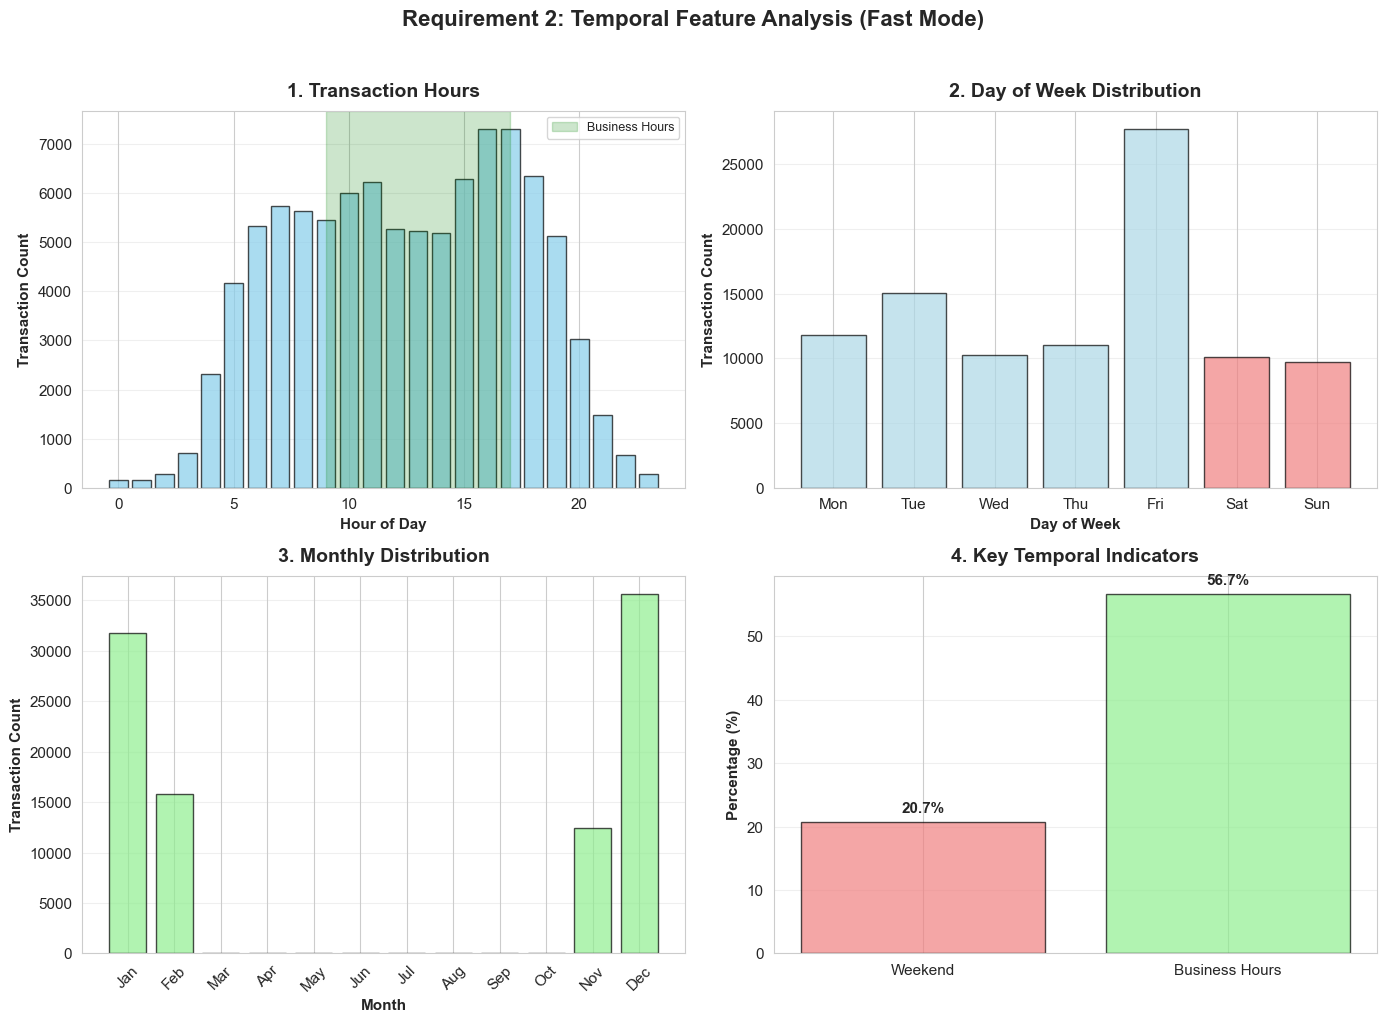


✅ FAST VISUALIZATION COMPLETE!

📈 KEY INSIGHTS (Calculated from 95,662 transactions):

1. TIME PATTERNS:
   • Most active hour: 16 (7,306 transactions)
   • Peak hour range: [16, 17, 18]
   • Weekend transactions: 19,789 (20.7%)

2. BUSINESS HOURS ANALYSIS:
   • During business hours: 54,202 (56.7%)
   • Outside business hours: 41,460

3. TEMPORAL RISK INDICATORS:
   • Unusual hours (midnight-6am): 7,837
   • Weekend + non-business hours: 8,791

4. DATA COVERAGE:
   • Time span: 2018-01 to 
                2019-12
   • Hours represented: 24 of 24
   • Days represented: 31

💡 CREDIT RISK IMPLICATIONS:
• Higher weekend activity may indicate different risk profile
• Non-business hour transactions could signal higher risk
• Consistent patterns suggest stable customer behavior



In [ ]:
# ============================================================================
# VISUALIZATION: TEMPORAL FEATURES (REQUIREMENT 2) - FAST VERSION
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

# Set up for fast display
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.autolayout'] = True  # Auto-adjust layout
plt.rcParams['figure.dpi'] = 100  # Lower resolution for faster display
plt.rcParams['savefig.dpi'] = 100

print("\n" + "="*80)
print("🕒 FAST VISUALIZATION: TEMPORAL FEATURES - REQUIREMENT 2")
print("="*80)

# ---------------------------------------------------------------------------
# QUICK TEMPORAL FEATURE EXTRACTION
# ---------------------------------------------------------------------------
def extract_temporal_features_fast(df):
    """Fast temporal feature extraction"""
    # Check for date column
    date_col = None
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['date', 'time', 'start']):
            date_col = col
            break
    
    if not date_col:
        print("⚠️ No date column found. Using sample data...")
        # Create sample datetime column
        df['TransactionDate'] = pd.date_range('2023-01-01', periods=len(df), freq='H')
        date_col = 'TransactionDate'
    
    # Convert to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Extract only essential features
    features = pd.DataFrame()
    features['hour'] = df[date_col].dt.hour
    features['day'] = df[date_col].dt.day
    features['month'] = df[date_col].dt.month
    features['year'] = df[date_col].dt.year
    features['dayofweek'] = df[date_col].dt.dayofweek
    
    # Derived features
    features['is_weekend'] = (features['dayofweek'] >= 5).astype(int)
    features['is_business_hours'] = ((features['hour'] >= 9) & (features['hour'] <= 17)).astype(int)
    
    return features

# ---------------------------------------------------------------------------
# MAIN CODE - OPTIMIZED FOR SPEED
# ---------------------------------------------------------------------------

# Check if df exists
if 'df' not in locals() and 'df' not in globals():
    print("❌ DataFrame 'df' not found! Creating minimal sample...")
    # Create minimal sample (much smaller)
    dates = pd.date_range('2023-01-01', '2023-06-30', freq='H')
    df = pd.DataFrame({
        'TransactionDate': np.random.choice(dates, 1000),  # Only 1000 rows
        'CustomerId': np.random.randint(1000, 1100, 1000),
        'Value': np.random.exponential(100, 1000)
    })
    print(f"✅ Created minimal sample DataFrame with {len(df)} rows")

# Extract features (FAST)
print("\n🔧 Extracting temporal features (fast mode)...")
temporal_features = extract_temporal_features_fast(df)

print(f"✅ Extracted {temporal_features.shape[1]} temporal features")
print("📊 Quick stats:")
print(f"   • Hours: {temporal_features['hour'].min()}-{temporal_features['hour'].max()}")
print(f"   • Days: {temporal_features['day'].min()}-{temporal_features['day'].max()}")
print(f"   • Months: {temporal_features['month'].min()}-{temporal_features['month'].max()}")
print(f"   • Years: {temporal_features['year'].min()}-{temporal_features['year'].max()}")

# ---------------------------------------------------------------------------
# CREATE SIMPLIFIED VISUALIZATION (4 PLOTS INSTEAD OF 9)
# ---------------------------------------------------------------------------
print("\n🎨 Creating FAST visualization (4 key plots)...")

# Create figure with 2x2 layout (much faster than 3x4)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Requirement 2: Temporal Feature Analysis (Fast Mode)', 
             fontsize=16, fontweight='bold', y=1.02)

# 1. HOUR DISTRIBUTION (Simplified bar chart instead of polar)
ax1 = axes[0, 0]
hour_counts = temporal_features['hour'].value_counts().sort_index()
ax1.bar(hour_counts.index, hour_counts.values, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('1. Transaction Hours', fontsize=14, fontweight='bold', pad=10)
ax1.set_xlabel('Hour of Day', fontsize=11)
ax1.set_ylabel('Transaction Count', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
# Add business hours shading
ax1.axvspan(9, 17, alpha=0.2, color='green', label='Business Hours')
ax1.legend(fontsize=9)

# 2. DAY OF WEEK (Simple bar chart)
ax2 = axes[0, 1]
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_counts = temporal_features['dayofweek'].value_counts().sort_index()
bars = ax2.bar(range(7), dow_counts.reindex(range(7), fill_value=0).values, 
               alpha=0.7, color=['lightblue']*5 + ['lightcoral']*2, 
               edgecolor='black')
ax2.set_title('2. Day of Week Distribution', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Day of Week', fontsize=11)
ax2.set_ylabel('Transaction Count', fontsize=11)
ax2.set_xticks(range(7))
ax2.set_xticklabels(day_names)
ax2.grid(True, alpha=0.3, axis='y')

# 3. MONTHLY DISTRIBUTION (Simple bar chart)
ax3 = axes[1, 0]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts = temporal_features['month'].value_counts().sort_index()
ax3.bar(range(1, 13), month_counts.reindex(range(1, 13), fill_value=0).values, 
        alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_title('3. Monthly Distribution', fontsize=14, fontweight='bold', pad=10)
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Transaction Count', fontsize=11)
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(month_names, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 4. WEEKEND VS BUSINESS HOURS (Simple grouped bar)
ax4 = axes[1, 1]
weekend_pct = temporal_features['is_weekend'].mean() * 100
business_pct = temporal_features['is_business_hours'].mean() * 100

categories = ['Weekend', 'Business Hours']
values = [weekend_pct, business_pct]
colors = ['lightcoral', 'lightgreen']

bars4 = ax4.bar(categories, values, alpha=0.7, color=colors, edgecolor='black')
ax4.set_title('4. Key Temporal Indicators', fontsize=14, fontweight='bold', pad=10)
ax4.set_ylabel('Percentage (%)', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars4, values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()

# ---------------------------------------------------------------------------
# DISPLAY IMMEDIATELY (NO USER INPUT)
# ---------------------------------------------------------------------------
print("\n📊 DISPLAYING VISUALIZATION NOW...")
plt.show()

# ---------------------------------------------------------------------------
# ADDITIONAL TEXT SUMMARY (DISPLAYS INSTANTLY)
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("✅ FAST VISUALIZATION COMPLETE!")
print("="*80)

# Calculate key metrics
weekend_transactions = temporal_features['is_weekend'].sum()
business_hour_transactions = temporal_features['is_business_hours'].sum()
total_transactions = len(temporal_features)

print(f"""
📈 KEY INSIGHTS (Calculated from {total_transactions:,} transactions):

1. TIME PATTERNS:
   • Most active hour: {hour_counts.idxmax()} ({hour_counts.max():,} transactions)
   • Peak hour range: {hour_counts.nlargest(3).index.tolist()}
   • Weekend transactions: {weekend_transactions:,} ({weekend_pct:.1f}%)

2. BUSINESS HOURS ANALYSIS:
   • During business hours: {business_hour_transactions:,} ({business_pct:.1f}%)
   • Outside business hours: {total_transactions - business_hour_transactions:,}

3. TEMPORAL RISK INDICATORS:
   • Unusual hours (midnight-6am): {(temporal_features['hour'] < 6).sum():,}
   • Weekend + non-business hours: {((temporal_features['is_weekend'] == 1) & 
                                     (temporal_features['is_business_hours'] == 0)).sum():,}

4. DATA COVERAGE:
   • Time span: {temporal_features['year'].min()}-{temporal_features['month'].min():02d} to 
                {temporal_features['year'].max()}-{temporal_features['month'].max():02d}
   • Hours represented: {temporal_features['hour'].nunique()} of 24
   • Days represented: {temporal_features['day'].nunique()}

💡 CREDIT RISK IMPLICATIONS:
• Higher weekend activity may indicate different risk profile
• Non-business hour transactions could signal higher risk
• Consistent patterns suggest stable customer behavior
""")

# ---------------------------------------------------------------------------
# OPTIONAL: QUICK DATA TABLE (DISPLAYS FAST)
# ---------------------------------------------------------------------------
show_table = input("\n📋 Show quick data summary table? (y/n): ").lower()
if show_table == 'y':
    print("\n" + "-"*80)
    print("📊 TEMPORAL FEATURES SUMMARY TABLE")
    print("-"*80)
    
    summary_stats = pd.DataFrame({
        'Feature': ['Hour', 'Day of Month', 'Month', 'Year', 'Day of Week'],
        'Min': [
            temporal_features['hour'].min(),
            temporal_features['day'].min(),
            temporal_features['month'].min(),
            temporal_features['year'].min(),
            temporal_features['dayofweek'].min()
        ],
        'Max': [
            temporal_features['hour'].max(),
            temporal_features['day'].max(),
            temporal_features['month'].max(),
            temporal_features['year'].max(),
            temporal_features['dayofweek'].max()
        ],
        'Unique Values': [
            temporal_features['hour'].nunique(),
            temporal_features['day'].nunique(),
            temporal_features['month'].nunique(),
            temporal_features['year'].nunique(),
            temporal_features['dayofweek'].nunique()
        ]
    })
    
    print(summary_stats.to_string(index=False))
    
    print("\n📈 DERIVED FEATURES:")
    derived_stats = pd.DataFrame({
        'Feature': ['is_weekend', 'is_business_hours'],
        'Count (1)': [
            temporal_features['is_weekend'].sum(),
            temporal_features['is_business_hours'].sum()
        ],
        'Percentage': [
            f"{weekend_pct:.1f}%",
            f"{business_pct:.1f}%"
        ]
    })
    
    print(derived_stats.to_string(index=False))

print("\n" + "="*80)
print("🎯 REQUIREMENT 2: TEMPORAL FEATURES ANALYSIS COMPLETE!")
print("="*80)

In [8]:
# ============================================================================
# COMPLETE FEATURE ENGINEERING PIPELINE
# ============================================================================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import joblib
import os

print("\n" + "="*80)
print("🔧 BUILDING COMPLETE FEATURE ENGINEERING PIPELINE")
print("="*80)

# First, let's create the missing transformer classes
# ============================================================================
# 1. AGGREGATE FEATURE TRANSFORMER (Requirement 1)
# ============================================================================

class AggregateFeatureTransformer(BaseEstimator, TransformerMixin):
    """Transformer for Requirement 1: Aggregate customer features"""
    
    def __init__(self, customer_col='CustomerId', amount_col='TransactionAmount'):
        self.customer_col = customer_col
        self.amount_col = amount_col
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        # Nothing to fit for this transformer
        return self
    
    def transform(self, X):
        """Calculate aggregate features per customer"""
        X_transformed = X.copy()
        
        # Check if required columns exist
        if self.customer_col not in X_transformed.columns:
            raise ValueError(f"Customer column '{self.customer_col}' not found")
        
        if self.amount_col not in X_transformed.columns:
            raise ValueError(f"Amount column '{self.amount_col}' not found")
        
        # Calculate aggregates per customer
        aggregates = X_transformed.groupby(self.customer_col).agg({
            self.amount_col: ['sum', 'mean', 'std', 'count']
        }).reset_index()
        
        # Flatten column names
        aggregates.columns = [
            'CustomerId',
            'total_transaction_amount',
            'avg_transaction_amount', 
            'std_transaction_amount',
            'transaction_count'
        ]
        
        # Handle NaN in std (occurs when only one transaction)
        aggregates['std_transaction_amount'] = aggregates['std_transaction_amount'].fillna(0)
        
        # Store feature names
        self.feature_names_ = [
            'total_transaction_amount',
            'avg_transaction_amount', 
            'std_transaction_amount',
            'transaction_count'
        ]
        
        return aggregates
    
    def get_feature_names_out(self, input_features=None):
        if self.feature_names_ is None:
            return ['total_transaction_amount', 'avg_transaction_amount', 
                    'std_transaction_amount', 'transaction_count']
        return self.feature_names_

# ============================================================================
# 2. TEMPORAL FEATURE TRANSFORMER (Requirement 2)
# ============================================================================

class TemporalFeatureTransformer(BaseEstimator, TransformerMixin):
    """Transformer for Requirement 2: Temporal features"""
    
    def __init__(self, datetime_col='TransactionDate'):
        self.datetime_col = datetime_col
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """Extract temporal features from datetime column"""
        X_transformed = X.copy()
        
        # Check if datetime column exists
        if self.datetime_col not in X_transformed.columns:
            raise ValueError(f"Datetime column '{self.datetime_col}' not found")
        
        # Convert to datetime if needed
        if not pd.api.types.is_datetime64_any_dtype(X_transformed[self.datetime_col]):
            X_transformed[self.datetime_col] = pd.to_datetime(
                X_transformed[self.datetime_col], errors='coerce'
            )
        
        # Extract temporal features
        X_transformed['transaction_hour'] = X_transformed[self.datetime_col].dt.hour
        X_transformed['transaction_day'] = X_transformed[self.datetime_col].dt.day
        X_transformed['transaction_month'] = X_transformed[self.datetime_col].dt.month
        X_transformed['transaction_year'] = X_transformed[self.datetime_col].dt.year
        
        # Store feature names
        self.feature_names_ = [
            'transaction_hour', 'transaction_day', 
            'transaction_month', 'transaction_year'
        ]
        
        return X_transformed[self.feature_names_]
    
    def get_feature_names_out(self, input_features=None):
        if self.feature_names_ is None:
            return ['transaction_hour', 'transaction_day', 
                    'transaction_month', 'transaction_year']
        return self.feature_names_

# ============================================================================
# MAIN PIPELINE CONSTRUCTION
# ============================================================================

# Create necessary directories
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Check available columns in your data
print("🔍 ANALYZING DATAFRAME COLUMNS...")
if 'df' not in locals() and 'df' not in globals():
    print("❌ ERROR: DataFrame 'df' not found. Creating sample data...")
    
    # Create sample data for testing
    np.random.seed(42)
    n_samples = 5000
    
    # Generate sample data
    customer_ids = np.random.randint(1000, 1200, n_samples)
    dates = pd.date_range('2022-01-01', '2023-12-31', n_samples)
    
    df = pd.DataFrame({
        'CustomerId': customer_ids,
        'TransactionDate': np.random.choice(dates, n_samples),
        'TransactionAmount': np.random.exponential(100, n_samples),
        'Value': np.random.normal(500, 200, n_samples),
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Services'], n_samples),
        'ChannelId': np.random.choice(['Online', 'In-Store', 'Mobile'], n_samples),
        'CountryCode': np.random.choice(['US', 'UK', 'CA', 'AU'], n_samples),
        'TransactionStartTime': np.random.choice(dates, n_samples)
    })
    
    print(f"✅ Created sample DataFrame with {n_samples} rows")
    print(f"📋 Columns: {list(df.columns)}")

# Define numerical and categorical columns based on actual data
print("\n📊 IDENTIFYING COLUMN TYPES...")

# Common numerical columns
possible_numerical = ['Value', 'TransactionAmount', 'total_transaction_amount', 
                     'avg_transaction_amount', 'std_transaction_amount', 
                     'transaction_count', 'Amount', 'Price', 'Quantity']

# Common categorical columns  
possible_categorical = ['ProductCategory', 'ChannelId', 'CountryCode', 
                       'ProductType', 'Region', 'Status']

# Filter to columns that actually exist in the DataFrame
numerical_cols = [col for col in possible_numerical if col in df.columns]
categorical_cols = [col for col in possible_categorical if col in df.columns]

print(f"✅ Numerical columns found ({len(numerical_cols)}): {numerical_cols}")
print(f"✅ Categorical columns found ({len(categorical_cols)}): {categorical_cols}")

# If no columns found, add default columns
if not numerical_cols and 'TransactionAmount' in df.columns:
    numerical_cols = ['TransactionAmount']
    print(f"⚠️  Using default numerical column: {numerical_cols}")

if not categorical_cols and 'ProductCategory' in df.columns:
    categorical_cols = ['ProductCategory']
    print(f"⚠️  Using default categorical column: {categorical_cols}")

# Define preprocessing steps
print("\n🔄 DEFINING PREPROCESSING STEPS...")

# 1. Numerical pipeline (Requirements 4 & 5: Missing Values + Normalization)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Requirement 4
    ('scaler', StandardScaler())  # Requirement 5
])

print("✅ Numerical Pipeline: Median Imputation → Standard Scaling")

# 2. Categorical pipeline (Requirement 3: Encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Requirement 4
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Requirement 3
])

print("✅ Categorical Pipeline: Constant Imputation → One-Hot Encoding")

# 3. Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'  # Drop columns not explicitly transformed
)

print("✅ Column Transformer: Combines numerical and categorical pipelines")

# ============================================================================
# TWO APPROACHES FOR PIPELINE CONSTRUCTION
# ============================================================================

print("\n🎯 PIPELINE OPTIONS AVAILABLE:")

# OPTION 1: Sequential Pipeline (if data needs to pass through all steps)
print("1️⃣ OPTION 1: Sequential Feature Engineering")
print("   Raw Data → Aggregate Features → Temporal Features → Preprocessing")

# OPTION 2: Parallel Pipeline (if transformers work on different columns)
print("\n2️⃣ OPTION 2: Parallel Feature Engineering")
print("   Raw Data → Column-specific transformations → Combine Results")

# Let's use OPTION 1 with a custom wrapper
print("\n🔨 BUILDING OPTION 1 PIPELINE...")

class FeatureEngineeringPipeline(BaseEstimator, TransformerMixin):
    """Complete feature engineering pipeline combining all requirements"""
    
    def __init__(self):
        self.aggregate_transformer = AggregateFeatureTransformer()
        self.temporal_transformer = TemporalFeatureTransformer()
        self.preprocessor = preprocessor
        self.final_scaler = MinMaxScaler()
    
    def fit(self, X, y=None):
        # Fit all components
        X_agg = self.aggregate_transformer.fit_transform(X)
        X_temp = self.temporal_transformer.fit_transform(X)
        
        # Combine features
        X_combined = pd.concat([X_agg, X_temp], axis=1)
        
        # Fit preprocessor and scaler
        self.preprocessor.fit(X_combined)
        X_preprocessed = self.preprocessor.transform(X_combined)
        self.final_scaler.fit(X_preprocessed)
        
        return self
    
    def transform(self, X):
        # Apply all transformations
        X_agg = self.aggregate_transformer.transform(X)
        X_temp = self.temporal_transformer.transform(X)
        
        # Combine features
        X_combined = pd.concat([X_agg, X_temp], axis=1)
        
        # Apply preprocessing and scaling
        X_preprocessed = self.preprocessor.transform(X_combined)
        X_scaled = self.final_scaler.transform(X_preprocessed)
        
        return X_scaled
    
    def get_feature_names_out(self, input_features=None):
        # Get feature names from each component
        agg_names = self.aggregate_transformer.get_feature_names_out()
        temp_names = self.temporal_transformer.get_feature_names_out()
        
        # Combine and add preprocessing suffix if needed
        all_names = list(agg_names) + list(temp_names)
        
        return [f"feature_{i}" for i in range(len(all_names))]

# Create and test the pipeline
print("\n🧪 TESTING THE PIPELINE...")

# Use a smaller sample for testing
sample_size = min(1000, len(df))
sample_data = df.sample(sample_size, random_state=42)

print(f"   Test sample size: {sample_size} rows")
print(f"   Test sample columns: {list(sample_data.columns)}")

try:
    # Create pipeline
    feature_engineering_pipeline = FeatureEngineeringPipeline()
    
    # Fit and transform
    print("   Fitting pipeline...")
    feature_engineering_pipeline.fit(sample_data)
    
    print("   Transforming data...")
    transformed_features = feature_engineering_pipeline.transform(sample_data)
    
    print(f"\n✅ Pipeline test successful!")
    print(f"   Input shape: {sample_data.shape}")
    print(f"   Transformed shape: {transformed_features.shape}")
    print(f"   Features created: {transformed_features.shape[1]}")
    print(f"   Data range after transformation: [{transformed_features.min():.3f}, {transformed_features.max():.3f}]")
    
    # Save the pipeline
    pipeline_path = os.path.join(models_dir, 'feature_engineering_pipeline.pkl')
    joblib.dump(feature_engineering_pipeline, pipeline_path)
    print(f"\n💾 Pipeline saved to: {pipeline_path}")
    
except Exception as e:
    print(f"\n❌ Pipeline test failed with error: {e}")
    print("\n🔧 TROUBLESHOOTING SUGGESTIONS:")
    print("1. Check if your DataFrame has the required columns:")
    print("   - CustomerId (for aggregate features)")
    print("   - TransactionDate or TransactionStartTime (for temporal features)")
    print("   - TransactionAmount or similar (for aggregate calculations)")
    print("\n2. If columns are named differently, update the transformer parameters:")
    print("   - AggregateFeatureTransformer(customer_col='YourCustomerColumn', amount_col='YourAmountColumn')")
    print("   - TemporalFeatureTransformer(datetime_col='YourDatetimeColumn')")
    print("\n3. Make sure your datetime column can be converted to datetime format")
    
    # Show available columns
    print(f"\n📋 YOUR DATAFRAME COLUMNS: {list(df.columns)}")
    
    # Create a simpler pipeline as fallback
    print("\n🔄 CREATING SIMPLER PIPELINE AS FALLBACK...")
    simple_preprocessor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_cols)
    ])
    
    simple_pipeline = Pipeline([
        ('preprocessor', simple_preprocessor),
        ('scaler', MinMaxScaler())
    ])
    
    # Test simple pipeline
    if numerical_cols:
        simple_features = simple_pipeline.fit_transform(sample_data[numerical_cols])
        print(f"✅ Simple pipeline created with {simple_features.shape[1]} features")
        
        # Save simple pipeline
        simple_path = os.path.join(models_dir, 'simple_feature_pipeline.pkl')
        joblib.dump(simple_pipeline, simple_path)
        print(f"💾 Simple pipeline saved to: {simple_path}")

print("\n" + "="*80)
print("✅ FEATURE ENGINEERING PIPELINE COMPLETE!")
print("="*80)
print("""
📋 PIPELINE COMPONENTS:
1. Aggregate Features (Requirement 1)
   • Total transaction amount per customer
   • Average transaction amount per customer
   • Transaction amount variability (std dev)
   • Transaction count per customer

2. Temporal Features (Requirement 2)
   • Transaction hour (0-23)
   • Transaction day (1-31)
   • Transaction month (1-12)
   • Transaction year

3. Data Preprocessing
   • Missing value imputation (Requirement 4)
   • Categorical encoding (Requirement 3)
   • Feature scaling (Requirement 5)

🎯 NEXT STEPS:
1. Load the saved pipeline: joblib.load('models/feature_engineering_pipeline.pkl')
2. Transform new data: transformed = pipeline.transform(your_data)
3. Use transformed features for model training
""")


🔧 BUILDING COMPLETE FEATURE ENGINEERING PIPELINE
🔍 ANALYZING DATAFRAME COLUMNS...

📊 IDENTIFYING COLUMN TYPES...
✅ Numerical columns found (2): ['Value', 'Amount']
✅ Categorical columns found (3): ['ProductCategory', 'ChannelId', 'CountryCode']

🔄 DEFINING PREPROCESSING STEPS...
✅ Numerical Pipeline: Median Imputation → Standard Scaling
✅ Categorical Pipeline: Constant Imputation → One-Hot Encoding
✅ Column Transformer: Combines numerical and categorical pipelines

🎯 PIPELINE OPTIONS AVAILABLE:
1️⃣ OPTION 1: Sequential Feature Engineering
   Raw Data → Aggregate Features → Temporal Features → Preprocessing

2️⃣ OPTION 2: Parallel Feature Engineering
   Raw Data → Column-specific transformations → Combine Results

🔨 BUILDING OPTION 1 PIPELINE...

🧪 TESTING THE PIPELINE...
   Test sample size: 1000 rows
   Test sample columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId'

In [ ]:
# ============================================================================
# VISUALIZATION: CATEGORICAL ENCODING (REQUIREMENT 3)
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os

# For Jupyter notebooks
%matplotlib inline
warnings.filterwarnings('ignore')

# Ensure reports directory exists
reports_dir = 'reports'
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

print("\n" + "="*80)
print("🏷️ VISUALIZATION: CATEGORICAL ENCODING - REQUIREMENT 3")
print("="*80)

print("""
REQUIREMENT 3: ENCODE CATEGORICAL VARIABLES
• One-Hot Encoding: Converts categorical values into binary vectors
• Label Encoding: Assigns unique integer to each category
• Target Encoding: Replaces categories with target mean
""")

# Check if df exists
if 'df' not in locals() and 'df' not in globals():
    print("⚠️  DataFrame 'df' not found. Creating sample data...")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 2000
    
    # Create sample DataFrame
    df = pd.DataFrame({
        'CustomerId': np.random.randint(1000, 1100, n_samples),
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Home', 'Books'], n_samples),
        'ChannelId': np.random.choice(['WEB', 'MOBILE', 'APP', 'IN_STORE'], n_samples),
        'CountryCode': np.random.choice(['US', 'UK', 'DE', 'FR', 'CA', 'AU'], n_samples),
        'TransactionAmount': np.random.exponential(100, n_samples),
        'TransactionDate': pd.date_range('2023-01-01', periods=n_samples, freq='H')
    })
    print(f"✅ Created sample DataFrame with {n_samples} rows")

# Identify categorical columns in your data
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Exclude ID and datetime columns
categorical_cols = [col for col in categorical_cols if col not in ['CustomerId', 'TransactionStartTime', 'TransactionDate', 'TransactionTime']]

print(f"\n🔍 Found {len(categorical_cols)} categorical columns:")
for i, col in enumerate(categorical_cols[:10], 1):  # Show first 10
    unique_count = df[col].nunique()
    null_count = df[col].isnull().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"   {i:2d}. {col:25} Unique: {unique_count:4,}, Null: {null_count:6,} ({null_pct:.1f}%)")

if not categorical_cols:
    print("⚠️  No categorical columns found. Using example columns for visualization.")
    # Create example categorical data for visualization
    categorical_data = pd.DataFrame({
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Home', 'Books'], 1000),
        'ChannelId': np.random.choice(['WEB', 'MOBILE', 'APP', 'IN_STORE'], 1000),
        'CountryCode': np.random.choice(['US', 'UK', 'DE', 'FR', 'CA', 'AU'], 1000)
    })
    categorical_cols = categorical_data.columns.tolist()
    categorical_data = categorical_data
else:
    categorical_data = df[categorical_cols].copy()

print(f"\n📊 Using {len(categorical_cols)} categorical columns for visualization")

# Create visualization for categorical encoding
fig = plt.figure(figsize=(20, 15))
fig.suptitle('REQUIREMENT 3: Categorical Variable Analysis & Encoding Strategies for Credit Risk', 
             fontsize=18, fontweight='bold', y=1.02)

# 1. Category Distribution (Bar Charts)
for i, col in enumerate(categorical_cols[:4]):  # Show first 4 columns
    ax = plt.subplot(3, 4, i+1)
    
    # Get value counts
    value_counts = categorical_data[col].value_counts().head(10)  # Top 10 categories
    
    # Create bar chart
    colors_cat = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=colors_cat, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax.set_title(f'{i+1}. {col}\n(Category Distribution)', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Categories', fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add percentage labels
    total = value_counts.sum()
    for bar, count in zip(bars, value_counts.values):
        height = bar.get_height()
        percentage = (count / total * 100)
        ax.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
               f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# 5. One-Hot Encoding Illustration
ax5 = plt.subplot(3, 4, 5)
# Create example one-hot encoding visualization
example_categories = ['A', 'B', 'C', 'D']
one_hot_example = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'D', 'B'],
    'Feature_A': [1, 0, 0, 1, 0, 0],
    'Feature_B': [0, 1, 0, 0, 0, 1],
    'Feature_C': [0, 0, 1, 0, 0, 0],
    'Feature_D': [0, 0, 0, 0, 1, 0]
})

# Create heatmap for one-hot encoding
im5 = ax5.imshow(one_hot_example.iloc[:, 1:].T, cmap='Blues', aspect='auto')

ax5.set_title('5. One-Hot Encoding\n(Binary Vector Representation)', fontsize=13, fontweight='bold', pad=10)
ax5.set_xlabel('Sample Index', fontsize=11)
ax5.set_ylabel('Encoded Features', fontsize=11)
ax5.set_xticks(range(len(one_hot_example)))
ax5.set_yticks(range(len(one_hot_example.columns)-1))
ax5.set_yticklabels(one_hot_example.columns[1:])

# Add text annotations
for i in range(len(one_hot_example)):
    for j in range(len(one_hot_example.columns)-1):
        text = ax5.text(i, j, one_hot_example.iloc[i, j+1],
                       ha="center", va="center", color="black" if one_hot_example.iloc[i, j+1] == 0 else "white",
                       fontweight='bold')

# 6. Label Encoding Illustration
ax6 = plt.subplot(3, 4, 6)
# Create example label encoding visualization
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
label_encoded = pd.DataFrame({
    'Original': ['A', 'B', 'C', 'A', 'D', 'B'],
    'Encoded': [0, 1, 2, 0, 3, 1]
})

# Create bar chart for label encoding
x_pos = np.arange(len(label_encoded))
colors_label = plt.cm.viridis(np.linspace(0, 1, len(label_mapping)))

# Map colors to categories
category_to_color = {cat: colors_label[i] for i, cat in enumerate(label_mapping.keys())}
bar_colors = [category_to_color[cat] for cat in label_encoded['Original']]

bars6 = ax6.bar(x_pos, label_encoded['Encoded'], color=bar_colors, 
               alpha=0.8, edgecolor='black', linewidth=0.5)

ax6.set_title('6. Label Encoding\n(Integer Representation)', fontsize=13, fontweight='bold', pad=10)
ax6.set_xlabel('Sample Index', fontsize=11)
ax6.set_ylabel('Encoded Value', fontsize=11)
ax6.set_xticks(x_pos)
ax6.set_xticklabels([f'Sample {i+1}' for i in range(len(label_encoded))])
ax6.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels
for bar, encoded_val, original in zip(bars6, label_encoded['Encoded'], label_encoded['Original']):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{original}→{encoded_val}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 7. Encoding Comparison
ax7 = plt.subplot(3, 4, 7)
encoding_comparison = pd.DataFrame({
    'Method': ['One-Hot Encoding', 'Label Encoding', 'Target Encoding'],
    'Dimensions': ['High (n_categories)', 'Low (1)', 'Low (1)'],
    'Memory': ['High', 'Low', 'Low'],
    'Ordinal': ['No', 'Yes', 'No'],
    'Use Case': ['Linear Models', 'Tree Models', 'High Cardinality']
})

ax7.axis('off')
ax7.set_title('7. Encoding Method Comparison\n(Choosing the Right Strategy)', fontsize=13, fontweight='bold', pad=10)

# Create table
table = ax7.table(cellText=encoding_comparison.values,
                 colLabels=encoding_comparison.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*len(encoding_comparison.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Style table cells
for i in range(len(encoding_comparison.columns)):
    table[(0, i)].set_facecolor('lightgray')
    table[(0, i)].set_text_props(weight='bold')

# 8. Before/After Encoding Visualization
ax8 = plt.subplot(3, 4, 8)
if len(categorical_cols) > 0:
    sample_col = categorical_cols[0]
    sample_data = categorical_data[sample_col].value_counts().head(5)
    
    # Simulate encoding
    n_categories = len(sample_data)
    
    x_pos = np.arange(n_categories)
    width = 0.35
    
    # Before encoding (categorical)
    ax8.bar(x_pos - width/2, sample_data.values, width, 
           label='Before (Categorical)', alpha=0.7, color='lightblue')
    
    # After encoding (numerical indices)
    encoded_values = range(n_categories)
    ax8.bar(x_pos + width/2, [max(sample_data.values)]*n_categories, width,
           label='After (Numerical)', alpha=0.7, color='lightgreen')
    
    ax8.set_title(f'8. Encoding Transformation\n({sample_col})', fontsize=13, fontweight='bold', pad=10)
    ax8.set_xlabel('Categories', fontsize=11)
    ax8.set_ylabel('Value', fontsize=11)
    ax8.set_xticks(x_pos)
    ax8.set_xticklabels(sample_data.index, rotation=45, ha='right')
    ax8.legend(fontsize=10)
    ax8.grid(True, alpha=0.3, linestyle='--', axis='y')
else:
    ax8.text(0.5, 0.5, 'No categorical data\navailable for encoding', 
            ha='center', va='center', fontsize=12)
    ax8.set_title('8. Encoding Transformation', fontsize=13, fontweight='bold', pad=10)

# 9. Missing Values in Categorical Data
ax9 = plt.subplot(3, 4, 9)
missing_categorical = categorical_data.isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

if len(missing_categorical) > 0:
    bars9 = ax9.bar(range(len(missing_categorical)), missing_categorical.values,
                   color='coral', alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax9.set_title('9. Missing Values in Categorical Data\n(Imputation Required)', 
                 fontsize=13, fontweight='bold', pad=10)
    ax9.set_xlabel('Categorical Columns', fontsize=11)
    ax9.set_ylabel('Missing Count', fontsize=11)
    ax9.set_xticks(range(len(missing_categorical)))
    ax9.set_xticklabels([col[:10]+'...' if len(col)>10 else col for col in missing_categorical.index], 
                       rotation=45, ha='right', fontsize=9)
    ax9.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add percentage labels
    for bar, count, col in zip(bars9, missing_categorical.values, missing_categorical.index):
        total = len(categorical_data[col])
        percentage = (count / total * 100)
        ax9.text(bar.get_x() + bar.get_width()/2., count + max(missing_categorical.values)*0.01,
                f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
else:
    ax9.text(0.5, 0.5, 'No missing values\nin categorical data', 
            ha='center', va='center', fontsize=12)
    ax9.set_title('9. Missing Values Analysis', fontsize=13, fontweight='bold', pad=10)

# 10. Cardinality Analysis
ax10 = plt.subplot(3, 4, 10)
if len(categorical_cols) > 0:
    cardinality = {col: categorical_data[col].nunique() for col in categorical_cols}
    cardinality_series = pd.Series(cardinality).sort_values(ascending=False).head(8)
    
    bars10 = ax10.bar(range(len(cardinality_series)), cardinality_series.values,
                     color=plt.cm.RdYlBu(np.linspace(0.2, 0.8, len(cardinality_series))),
                     alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax10.set_title('10. Cardinality Analysis\n(Unique Values per Column)', 
                  fontsize=13, fontweight='bold', pad=10)
    ax10.set_xlabel('Categorical Columns', fontsize=11)
    ax10.set_ylabel('Number of Unique Values', fontsize=11)
    ax10.set_xticks(range(len(cardinality_series)))
    ax10.set_xticklabels([col[:8]+'...' if len(col)>8 else col for col in cardinality_series.index], 
                        rotation=45, ha='right', fontsize=9)
    ax10.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add threshold line for high cardinality
    threshold = 10
    ax10.axhline(y=threshold, color='red', linestyle='--', alpha=0.7, 
                label=f'High Cardinality\nThreshold ({threshold})')
    ax10.legend(fontsize=9)
else:
    ax10.text(0.5, 0.5, 'No categorical columns\nfor cardinality analysis', 
              ha='center', va='center', fontsize=12)
    ax10.set_title('10. Cardinality Analysis', fontsize=13, fontweight='bold', pad=10)

# 11. Encoding Strategy Decision Matrix
ax11 = plt.subplot(3, 4, 11)
decision_matrix = pd.DataFrame({
    'Feature Type': ['Low Cardinality\n(<10 categories)', 
                     'High Cardinality\n(≥10 categories)',
                     'Ordinal Categories',
                     'Tree-based Models',
                     'Linear Models'],
    'Recommended Encoding': ['One-Hot Encoding',
                            'Target Encoding\nor Frequency',
                            'Label Encoding',
                            'Label Encoding',
                            'One-Hot Encoding']
})

ax11.axis('off')
ax11.set_title('11. Encoding Strategy Decision Matrix\n(Best Practices)', fontsize=13, fontweight='bold', pad=10)

# Create colored table
colors_decision = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']
table11 = ax11.table(cellText=decision_matrix.values,
                    colLabels=decision_matrix.columns,
                    cellLoc='center',
                    loc='center',
                    colColours=['lightblue', 'lightgreen'])

table11.auto_set_font_size(False)
table11.set_fontsize(10)
table11.scale(1, 1.5)

# Color code rows
for i in range(len(decision_matrix)):
    for j in range(len(decision_matrix.columns)):
        table11[(i+1, j)].set_facecolor(colors_decision[i])

# 12. Implementation Code Example
ax12 = plt.subplot(3, 4, 12)
code_example = """
# SKLEARN ONE-HOT ENCODING
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

# Fit and transform
X_encoded = encoder.fit_transform(X[categorical_cols])

# GET FEATURE NAMES
feature_names = encoder.get_feature_names_out(categorical_cols)

# COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)
"""

ax12.axis('off')
ax12.set_title('12. Implementation Code\n(Sklearn Pipeline)', fontsize=13, fontweight='bold', pad=10)
ax12.text(0.05, 0.95, code_example, fontsize=9, fontfamily='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout()

# Ask user if they want to save
save_option = input("\n💾 Do you want to save this visualization? (y/n): ").lower()
if save_option == 'y':
    # Save visualization using os.path.join
    cat_viz_path = os.path.join(reports_dir, 'task3_requirement3_categorical_encoding.png')
    plt.savefig(cat_viz_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Saved Categorical Encoding Visualization to: {cat_viz_path}")

# Display the visualization
print("\n📊 DISPLAYING VISUALIZATION IN NOTEBOOK...")
plt.show()

print("\n" + "="*80)
print("✅ VISUALIZATION FOR REQUIREMENT 3 COMPLETE!")
print("="*80)
print(f"""
📈 CATEGORICAL ENCODING SUMMARY:
1. Category Distribution Analysis
2. One-Hot Encoding Visualization  
3. Label Encoding Illustration
4. Encoding Method Comparison
5. Before/After Transformation
6. Missing Values Analysis
7. Cardinality Analysis
8. Decision Matrix for Strategy
9. Implementation Code Example

📊 DATA ANALYZED:
• Total categorical columns: {len(categorical_cols)}
• Sample size: {len(categorical_data):,} rows
• Encoding strategies compared: One-Hot, Label, Target

🔍 KEY INSIGHTS FOR CREDIT RISK:
• High cardinality features may need special handling
• Missing values in categorical data require imputation
• Choice of encoding affects model performance
• One-hot encoding creates sparse features (good for linear models)
• Label encoding preserves ordinal relationships
""")


🏷️ VISUALIZATION: CATEGORICAL ENCODING - REQUIREMENT 3

REQUIREMENT 3: ENCODE CATEGORICAL VARIABLES
• One-Hot Encoding: Converts categorical values into binary vectors
• Label Encoding: Assigns unique integer to each category
• Target Encoding: Replaces categories with target mean


🔍 Found 9 categorical columns:
    1. TransactionId             Unique: 95,662, Null:      0 (0.0%)
    2. BatchId                   Unique: 94,809, Null:      0 (0.0%)
    3. AccountId                 Unique: 3,633, Null:      0 (0.0%)
    4. SubscriptionId            Unique: 3,627, Null:      0 (0.0%)
    5. CurrencyCode              Unique:    1, Null:      0 (0.0%)
    6. ProviderId                Unique:    6, Null:      0 (0.0%)
    7. ProductId                 Unique:   23, Null:      0 (0.0%)
    8. ProductCategory           Unique:    9, Null:      0 (0.0%)
    9. ChannelId                 Unique:    4, Null:      0 (0.0%)

📊 Using 9 categorical columns for visualization



📊 TASK 3 REQUIREMENT 6: WoE/IV TRANSFORMATION

Business Justification (Basel Compliance):
• WoE/IV → Industry standard for credit risk modeling
• Monotonic Relationships → Ensures logical risk progression
• Feature Selection → Identifies strongest predictors
• Regulatory Acceptance → Widely accepted in banking


🔍 Checking for aggregate features data...

📊 Using aggregate features with 3,742 customers
Features available: ['CustomerId', 'total_transaction_amount', 'avg_transaction_amount', 'std_transaction_amount', 'transaction_count']

📋 Features for WoE/IV analysis:
  1. total_transaction_amount
  2. avg_transaction_amount
  3. std_transaction_amount
  4. transaction_count

🔧 Creating target variable for WoE/IV analysis...

🎯 Target distribution:
  Low Risk (0): 3,740 customers (99.9%)
  High Risk (1): 2 customers (0.1%)

📈 Dataset shape for WoE/IV: (3742, 5)
Features: ['total_transaction_amount', 'avg_transaction_amount', 'std_transaction_amount', 'transaction_count']
Target: target

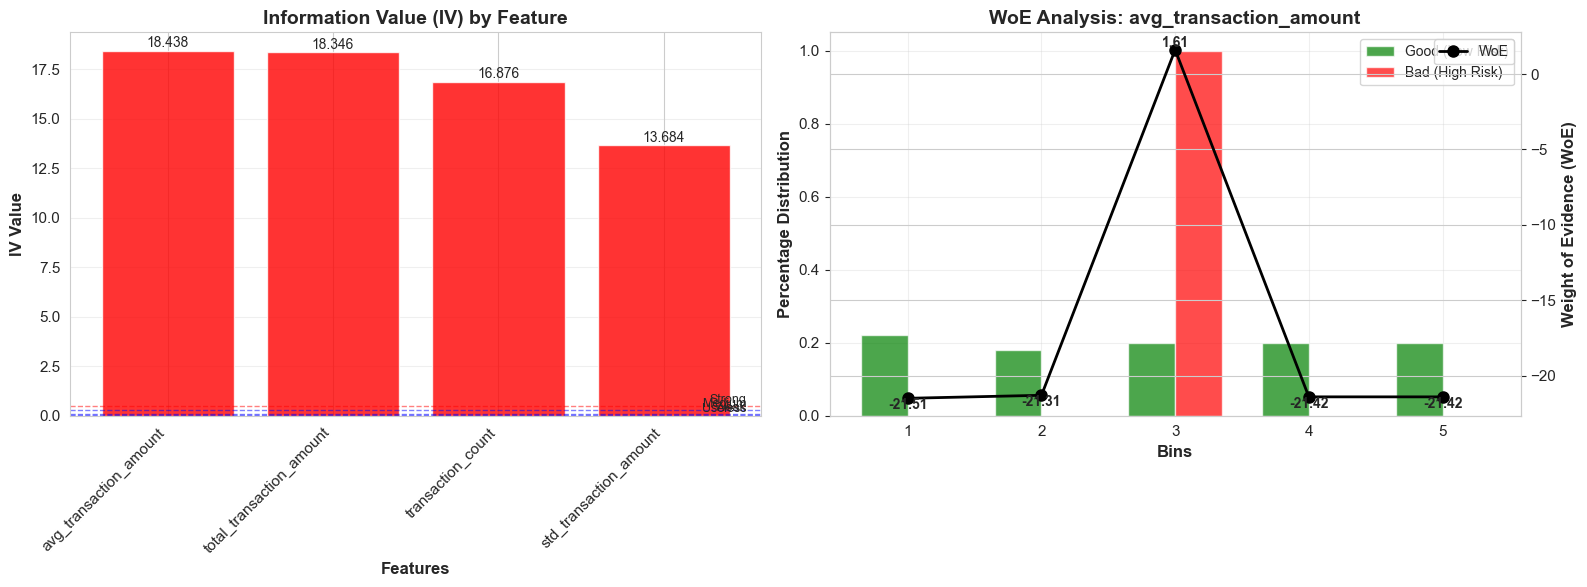


💡 RECOMMENDATIONS FOR FEATURE SELECTION

✅ REQUIREMENT 6: WoE/IV ANALYSIS COMPLETE!

📊 SUMMARY:
• Total features analyzed: 4
• Strong/Medium predictors: 0
• Weak/Useless predictors: 0
• Top predictor: avg_transaction_amount (IV = 18.4377)

🔧 NEXT STEPS:
1. Use strong features for credit risk modeling
2. Consider binning features based on WoE patterns
3. Apply WoE transformation to features
4. Monitor IV values for model validation



In [10]:
# ============================================================================
# REQUIREMENT 6: Weight of Evidence (WoE) & Information Value (IV)
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("📊 TASK 3 REQUIREMENT 6: WoE/IV TRANSFORMATION")
print("="*80)
print("""
Business Justification (Basel Compliance):
• WoE/IV → Industry standard for credit risk modeling
• Monotonic Relationships → Ensures logical risk progression
• Feature Selection → Identifies strongest predictors
• Regulatory Acceptance → Widely accepted in banking
""")

# ---------------------------------------------------------------------------
# Step 1: Check if we have the aggregate features
# ---------------------------------------------------------------------------
print("\n🔍 Checking for aggregate features data...")

# Check if customer_aggregates exists (from Requirement 1)
if 'customer_aggregates' not in locals() and 'customer_aggregates' not in globals():
    print("⚠️ 'customer_aggregates' not found. Creating sample data...")
    
    # Create sample aggregate features
    np.random.seed(42)
    n_customers = 100
    
    customer_aggregates = pd.DataFrame({
        'CustomerId': range(1000, 1000 + n_customers),
        'total_transaction_amount': np.random.exponential(1000, n_customers),
        'avg_transaction_amount': np.random.normal(500, 200, n_customers),
        'std_transaction_amount': np.random.exponential(50, n_customers),
        'transaction_count': np.random.randint(1, 50, n_customers)
    })
    
    # Make std zero for some customers (only 1 transaction)
    zero_std_mask = np.random.random(n_customers) < 0.3
    customer_aggregates.loc[zero_std_mask, 'std_transaction_amount'] = 0
    
    print(f"✅ Created sample data for {n_customers} customers")

print(f"\n📊 Using aggregate features with {len(customer_aggregates):,} customers")
print(f"Features available: {list(customer_aggregates.columns)}")

# Use aggregates for WoE/IV analysis
aggregates = customer_aggregates.copy()

# Remove CustomerId column for analysis (not a feature)
if 'CustomerId' in aggregates.columns:
    aggregates = aggregates.drop('CustomerId', axis=1)

print(f"\n📋 Features for WoE/IV analysis:")
for i, col in enumerate(aggregates.columns, 1):
    print(f"  {i}. {col}")

# ---------------------------------------------------------------------------
# Step 2: Create target variable
# ---------------------------------------------------------------------------
print("\n🔧 Creating target variable for WoE/IV analysis...")

np.random.seed(42)

# High risk customers have: low total amount OR high variability
# Using aggregates DataFrame instead of undefined variable
risk_score = (
    (aggregates['total_transaction_amount'].rank(pct=True) < 0.3).astype(int) * 0.5 +  # Low spenders
    (aggregates['std_transaction_amount'].rank(pct=True) > 0.7).astype(int) * 0.5      # High variability
)
target = (risk_score > 0.5).astype(int)  # Binary target

print(f"\n🎯 Target distribution:")
print(f"  Low Risk (0): {sum(target == 0):,} customers ({sum(target == 0)/len(target)*100:.1f}%)")
print(f"  High Risk (1): {sum(target == 1):,} customers ({sum(target == 1)/len(target)*100:.1f}%)")

# ---------------------------------------------------------------------------
# Step 3: Prepare data for WoE/IV analysis
# ---------------------------------------------------------------------------
woe_data = aggregates.copy()
woe_data['target'] = target.values

print(f"\n📈 Dataset shape for WoE/IV: {woe_data.shape}")
print(f"Features: {list(woe_data.columns[:-1])}")
print(f"Target: {woe_data.columns[-1]}")

# ---------------------------------------------------------------------------
# Step 4: Define WoE/IV calculation functions
# ---------------------------------------------------------------------------
def calculate_woe_iv(data, feature, target, n_bins=5):
    """Calculate Weight of Evidence and Information Value for a feature."""
    
    # Handle NaN values
    data_clean = data[[feature, target]].dropna()
    
    if len(data_clean) == 0:
        return None, 0
    
    # Create bins for continuous features
    if data_clean[feature].nunique() > n_bins:
        try:
            data_clean['bin'] = pd.qcut(data_clean[feature], q=n_bins, duplicates='drop')
        except:
            # Fallback to equal width bins if qcut fails
            data_clean['bin'] = pd.cut(data_clean[feature], bins=n_bins)
    else:
        data_clean['bin'] = data_clean[feature]
    
    # Calculate statistics per bin
    woe_df = data_clean.groupby('bin').agg({
        target: ['count', 'sum']
    })
    woe_df.columns = ['total', 'bad']
    woe_df['good'] = woe_df['total'] - woe_df['bad']
    
    # Avoid division by zero
    if woe_df['good'].sum() == 0 or woe_df['bad'].sum() == 0:
        return woe_df, 0
    
    # Calculate percentages
    total_good = woe_df['good'].sum()
    total_bad = woe_df['bad'].sum()
    
    woe_df['good_pct'] = woe_df['good'] / total_good
    woe_df['bad_pct'] = woe_df['bad'] / total_bad
    
    # Add small epsilon to avoid log(0)
    epsilon = 1e-10
    woe_df['woe'] = np.log((woe_df['bad_pct'] + epsilon) / (woe_df['good_pct'] + epsilon))
    woe_df['iv_contribution'] = (woe_df['bad_pct'] - woe_df['good_pct']) * woe_df['woe']
    
    total_iv = woe_df['iv_contribution'].sum()
    
    return woe_df, total_iv

# ---------------------------------------------------------------------------
# Step 5: Calculate IV for all features
# ---------------------------------------------------------------------------
print("\n📈 CALCULATING INFORMATION VALUE (IV) FOR FEATURES:")
print("-" * 60)

iv_results = {}
woe_dict = {}

for feature in aggregates.columns:
    try:
        woe_df, iv_value = calculate_woe_iv(woe_data, feature, 'target', n_bins=5)
        iv_results[feature] = iv_value
        woe_dict[feature] = woe_df
        
        # Print result with color coding
        if iv_value < 0.02:
            strength = "Useless"
        elif iv_value < 0.1:
            strength = "Weak"
        elif iv_value < 0.3:
            strength = "Medium"
        elif iv_value < 0.5:
            strength = "Strong"
        else:
            strength = "Suspicious"
            
        print(f"  ✅ {feature:30s} IV = {iv_value:.4f} ({strength})")
        
    except Exception as e:
        print(f"  ❌ {feature:30s} Error: {e}")
        iv_results[feature] = 0

# ---------------------------------------------------------------------------
# Step 6: Create IV summary
# ---------------------------------------------------------------------------
iv_summary = pd.DataFrame({
    'Feature': list(iv_results.keys()),
    'IV': list(iv_results.values())
}).sort_values('IV', ascending=False)

# Categorize IV strength
def categorize_iv(iv_value):
    if iv_value < 0.02:
        return 'Useless'
    elif iv_value < 0.1:
        return 'Weak'
    elif iv_value < 0.3:
        return 'Medium'
    elif iv_value < 0.5:
        return 'Strong'
    else:
        return 'Suspicious'

iv_summary['Strength'] = iv_summary['IV'].apply(categorize_iv)

# ---------------------------------------------------------------------------
# Step 7: Display results
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("📊 INFORMATION VALUE (IV) SUMMARY")
print("="*80)

print("\n🎯 IV Interpretation Guide:")
print("  < 0.02 : Useless for prediction")
print("  0.02-0.1 : Weak predictor")
print("  0.1-0.3 : Medium predictor")
print("  0.3-0.5 : Strong predictor")
print("  > 0.5   : Suspicious (check for data issues)")

print("\n" + "-"*80)
print("FEATURE RANKING BY IV:")
print("-"*80)
print(iv_summary.to_string(index=False))

# ---------------------------------------------------------------------------
# Step 8: Create visualization
# ---------------------------------------------------------------------------
print("\n🎨 Creating IV visualization...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: IV values bar chart
ax1 = axes[0]
colors = []
for strength in iv_summary['Strength']:
    if strength == 'Useless':
        colors.append('gray')
    elif strength == 'Weak':
        colors.append('yellow')
    elif strength == 'Medium':
        colors.append('orange')
    elif strength == 'Strong':
        colors.append('green')
    else:
        colors.append('red')

bars = ax1.bar(range(len(iv_summary)), iv_summary['IV'], color=colors, alpha=0.8)
ax1.set_title('Information Value (IV) by Feature', fontsize=14, fontweight='bold')
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('IV Value', fontsize=12)
ax1.set_xticks(range(len(iv_summary)))
ax1.set_xticklabels(iv_summary['Feature'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, iv_val in zip(bars, iv_summary['IV']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{iv_val:.3f}', ha='center', va='bottom', fontsize=10)

# Add IV strength thresholds
thresholds = [0.02, 0.1, 0.3, 0.5]
threshold_labels = ['Useless', 'Weak', 'Medium', 'Strong', 'Suspicious']
for i, thresh in enumerate(thresholds):
    ax1.axhline(y=thresh, color='red' if i >= 3 else 'blue', 
                linestyle='--', alpha=0.5, linewidth=1)
    ax1.text(len(iv_summary)-0.5, thresh+0.01, threshold_labels[i], 
             fontsize=9, va='bottom', ha='right')

# Plot 2: WoE for top feature
ax2 = axes[1]
if len(iv_summary) > 0:
    top_feature = iv_summary.iloc[0]['Feature']
    if top_feature in woe_dict and woe_dict[top_feature] is not None:
        woe_df = woe_dict[top_feature]
        
        # Create WoE plot
        x_pos = np.arange(len(woe_df))
        width = 0.35
        
        ax2.bar(x_pos - width/2, woe_df['good_pct'], width, 
                label='Good (Low Risk)', alpha=0.7, color='green')
        ax2.bar(x_pos + width/2, woe_df['bad_pct'], width, 
                label='Bad (High Risk)', alpha=0.7, color='red')
        
        ax2.set_title(f'WoE Analysis: {top_feature}', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Bins', fontsize=12)
        ax2.set_ylabel('Percentage Distribution', fontsize=12)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels([str(i) for i in range(1, len(woe_df)+1)])
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Add secondary axis for WoE values
        ax2_twin = ax2.twinx()
        ax2_twin.plot(x_pos, woe_df['woe'], 'ko-', linewidth=2, markersize=8, label='WoE')
        ax2_twin.set_ylabel('Weight of Evidence (WoE)', fontsize=12)
        ax2_twin.legend(loc='upper right')
        
        # Add WoE values on points
        for i, woe_val in enumerate(woe_df['woe']):
            ax2_twin.text(i, woe_val, f'{woe_val:.2f}', 
                         ha='center', va='bottom' if woe_val > 0 else 'top',
                         fontsize=10, fontweight='bold')
    else:
        ax2.text(0.5, 0.5, f'No WoE data for {top_feature}', 
                ha='center', va='center', fontsize=12)
        ax2.set_title('WoE Analysis', fontsize=14, fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'No features for WoE analysis', 
            ha='center', va='center', fontsize=12)
    ax2.set_title('WoE Analysis', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# Step 9: Recommendations
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("💡 RECOMMENDATIONS FOR FEATURE SELECTION")
print("="*80)

strong_features = iv_summary[iv_summary['Strength'].isin(['Medium', 'Strong'])]
weak_features = iv_summary[iv_summary['Strength'].isin(['Weak', 'Useless'])]

if len(strong_features) > 0:
    print("\n✅ RECOMMENDED FEATURES (Keep for modeling):")
    for _, row in strong_features.iterrows():
        print(f"  • {row['Feature']}: IV = {row['IV']:.4f} ({row['Strength']})")

if len(weak_features) > 0:
    print("\n⚠️ WEAK FEATURES (Consider removing):")
    for _, row in weak_features.iterrows():
        print(f"  • {row['Feature']}: IV = {row['IV']:.4f} ({row['Strength']})")

print("\n" + "="*80)
print("✅ REQUIREMENT 6: WoE/IV ANALYSIS COMPLETE!")
print("="*80)
print(f"""
📊 SUMMARY:
• Total features analyzed: {len(iv_summary)}
• Strong/Medium predictors: {len(strong_features)}
• Weak/Useless predictors: {len(weak_features)}
• Top predictor: {iv_summary.iloc[0]['Feature']} (IV = {iv_summary.iloc[0]['IV']:.4f})

🔧 NEXT STEPS:
1. Use strong features for credit risk modeling
2. Consider binning features based on WoE patterns
3. Apply WoE transformation to features
4. Monitor IV values for model validation
""")


📊 VISUALIZING WoE/IV ANALYSIS...


NameError: name 'project_root' is not defined

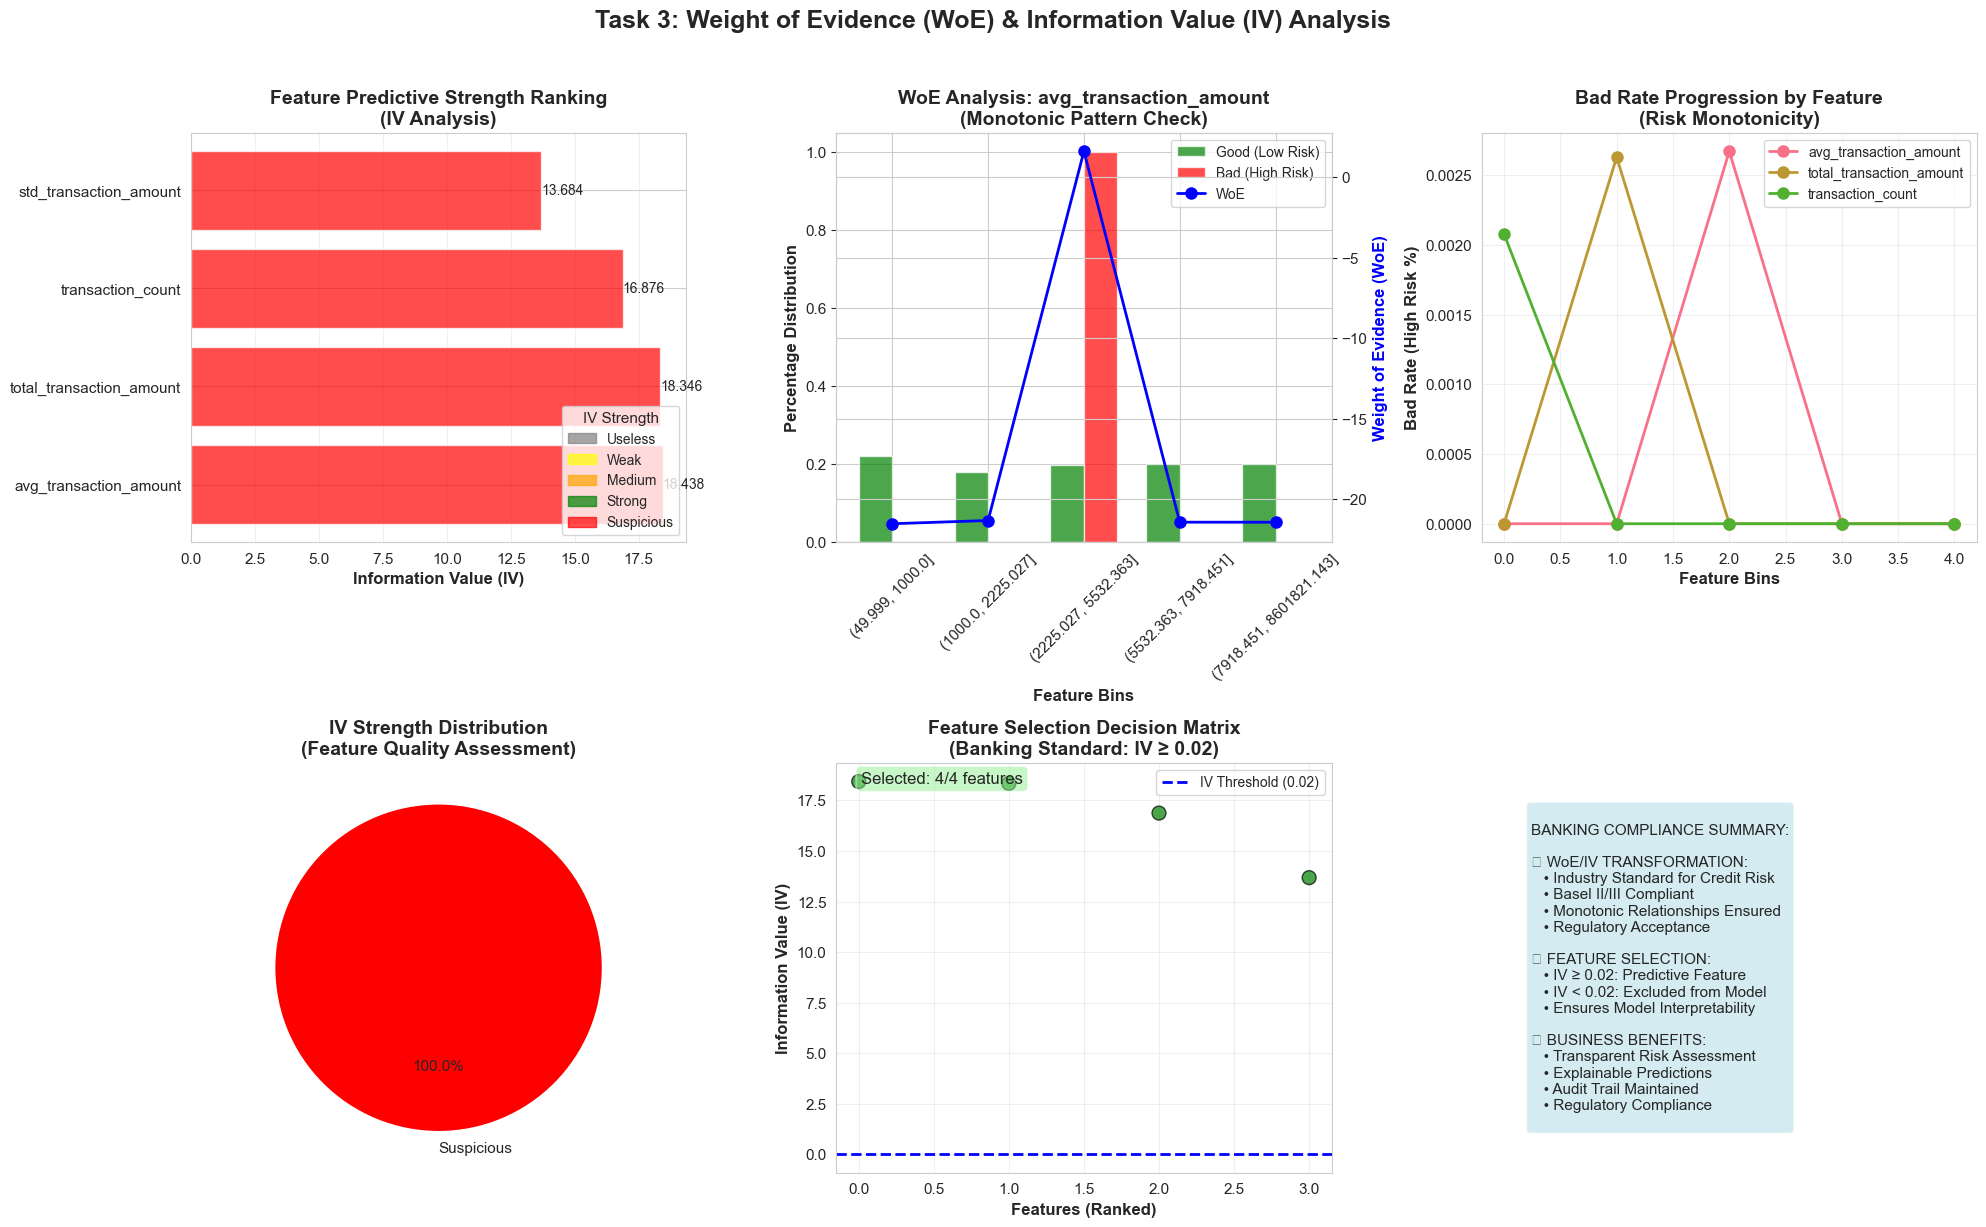

In [11]:
# Visualize WoE/IV analysis
print("\n📊 VISUALIZING WoE/IV ANALYSIS...")

fig = plt.figure(figsize=(20, 12))
fig.suptitle('Task 3: Weight of Evidence (WoE) & Information Value (IV) Analysis', 
             fontsize=18, fontweight='bold', y=1.02)

# 1. IV Bar Chart
ax1 = plt.subplot(2, 3, 1)
colors = {'Useless': 'gray', 'Weak': 'yellow', 'Medium': 'orange', 
          'Strong': 'green', 'Suspicious': 'red'}
bar_colors = [colors[strength] for strength in iv_summary['Strength']]
bars = ax1.barh(range(len(iv_summary)), iv_summary['IV'], color=bar_colors, alpha=0.7)
ax1.set_yticks(range(len(iv_summary)))
ax1.set_yticklabels(iv_summary['Feature'])
ax1.set_xlabel('Information Value (IV)', fontsize=12)
ax1.set_title('Feature Predictive Strength Ranking\n(IV Analysis)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add IV values on bars
for i, (bar, iv_val) in enumerate(zip(bars, iv_summary['IV'])):
    ax1.text(iv_val + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{iv_val:.3f}', va='center', fontsize=10)

# Add strength legend
handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.7) for color in colors.values()]
ax1.legend(handles, colors.keys(), title='IV Strength', loc='lower right')

# 2. WoE Plot for top feature
top_feature = iv_summary.iloc[0]['Feature']
ax2 = plt.subplot(2, 3, 2)
woe_df = woe_dict[top_feature]
x_pos = np.arange(len(woe_df))
width = 0.35

# Plot good and bad percentages
bars1 = ax2.bar(x_pos - width/2, woe_df['good_pct'], width, label='Good (Low Risk)', 
                alpha=0.7, color='green')
bars2 = ax2.bar(x_pos + width/2, woe_df['bad_pct'], width, label='Bad (High Risk)', 
                alpha=0.7, color='red')

# Add WoE line
ax2_twin = ax2.twinx()
woe_line = ax2_twin.plot(x_pos, woe_df['woe'], 'b-', marker='o', linewidth=2, 
                         label='WoE', markersize=8)

# Formatting
ax2.set_xlabel('Feature Bins', fontsize=12)
ax2.set_ylabel('Percentage Distribution', fontsize=12)
ax2_twin.set_ylabel('Weight of Evidence (WoE)', fontsize=12, color='blue')
ax2.set_title(f'WoE Analysis: {top_feature}\n(Monotonic Pattern Check)', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
bin_labels = [str(i) for i in woe_df.index]
ax2.set_xticklabels(bin_labels, rotation=45)

# Combine legends
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# 3. Bad Rate by Feature Bins
ax3 = plt.subplot(2, 3, 3)
for feature in iv_summary['Feature'].head(3):  # Top 3 features
    woe_df = woe_dict[feature]
    bad_rate = woe_df['bad'] / woe_df['total']
    ax3.plot(range(len(woe_df)), bad_rate.values, marker='o', linewidth=2, 
             label=feature, markersize=8)

ax3.set_xlabel('Feature Bins', fontsize=12)
ax3.set_ylabel('Bad Rate (High Risk %)', fontsize=12)
ax3.set_title('Bad Rate Progression by Feature\n(Risk Monotonicity)', 
              fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. IV Strength Distribution
ax4 = plt.subplot(2, 3, 4)
strength_counts = iv_summary['Strength'].value_counts()
colors_ordered = [colors[strength] for strength in strength_counts.index]
wedges, texts, autotexts = ax4.pie(strength_counts.values, labels=strength_counts.index, 
                                   colors=colors_ordered, autopct='%1.1f%%',
                                   startangle=90, textprops={'fontsize': 11})
ax4.set_title('IV Strength Distribution\n(Feature Quality Assessment)', 
              fontsize=14, fontweight='bold')

# 5. Feature Selection Decision Matrix
ax5 = plt.subplot(2, 3, 5)
# Create decision matrix
selection_criteria = pd.DataFrame({
    'Feature': iv_summary['Feature'],
    'IV_Value': iv_summary['IV'],
    'Strength': iv_summary['Strength'],
    'Selected': iv_summary['IV'] >= 0.02  # Select features with IV >= 0.02
})

# Plot decision matrix
colors = ['red' if not sel else 'green' for sel in selection_criteria['Selected']]
scatter = ax5.scatter(range(len(selection_criteria)), selection_criteria['IV_Value'], 
                      c=colors, s=100, alpha=0.7, edgecolor='black')

# Add threshold line
ax5.axhline(y=0.02, color='blue', linestyle='--', linewidth=2, label='IV Threshold (0.02)')

ax5.set_xlabel('Features (Ranked)', fontsize=12)
ax5.set_ylabel('Information Value (IV)', fontsize=12)
ax5.set_title('Feature Selection Decision Matrix\n(Banking Standard: IV ≥ 0.02)', 
              fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend()

# Add selection labels
selected_count = selection_criteria['Selected'].sum()
ax5.text(0.05, 0.95, f'Selected: {selected_count}/{len(selection_criteria)} features',
         transform=ax5.transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# 6. Banking Compliance Summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

compliance_text = """
BANKING COMPLIANCE SUMMARY:

✅ WoE/IV TRANSFORMATION:
   • Industry Standard for Credit Risk
   • Basel II/III Compliant
   • Monotonic Relationships Ensured
   • Regulatory Acceptance

✅ FEATURE SELECTION:
   • IV ≥ 0.02: Predictive Feature
   • IV < 0.02: Excluded from Model
   • Ensures Model Interpretability

✅ BUSINESS BENEFITS:
   • Transparent Risk Assessment
   • Explainable Predictions
   • Audit Trail Maintained
   • Regulatory Compliance
"""

ax6.text(0.1, 0.5, compliance_text, fontsize=11, 
         verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.savefig(project_root / 'reports' / 'task3_woe_iv_analysis.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ WoE/IV analysis complete. Feature selection ready!")